# Uczenie Maszynowe - Lista 3

## import bibliotek

In [1]:
%pip install ucimlrepo
%pip install pandas
%pip install numpy
%pip install ipywidgets
%pip install sweetviz
%pip install scikit-learn
%pip install matplotlib
%pip install seaborn
%pip install graphviz

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
from ucimlrepo import fetch_ucirepo
import numpy as np
import pandas as pd
import sweetviz as sv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelBinarizer

In [3]:
# fetch dataset
secondary_mushroom = fetch_ucirepo(id=848)

# data (as pandas dataframes)
X = secondary_mushroom.data.features
y = secondary_mushroom.data.targets

# metadata
print(secondary_mushroom.metadata)

# variable information
print(secondary_mushroom.variables)

{'uci_id': 848, 'name': 'Secondary Mushroom', 'repository_url': 'https://archive.ics.uci.edu/dataset/848/secondary+mushroom+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/848/data.csv', 'abstract': 'Dataset of simulated mushrooms for binary classification into edible and poisonous.', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 61068, 'num_features': 20, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2021, 'last_updated': 'Wed Apr 10 2024', 'dataset_doi': '10.24432/C5FP5Q', 'creators': ['Dennis Wagner', 'D. Heider', 'Georges Hattab'], 'intro_paper': {'title': 'Mushroom data creation, curation, and simulation to support classification tasks', 'authors': 'Dennis Wagner, D. Heider, Georges Hattab', 'published_in': 'Scientific Reports', 'year': 2021, 'url': 'https://www.semanticscholar.org/

## Analiza zbioru danych


Czym w ogóle jest zbiór?
Jaki jest sens?
W jaką stronę chcemy zbiegać z klasyfikacją?

In [4]:
#merge X and y
df = pd.concat([X, y], axis=1)

In [5]:
# data preview
df.head()

cap-diameter cap-shape cap-surface cap-color does-bruise-or-bleed  \
0         15.26         x           g         o                    f   
1         16.60         x           g         o                    f   
2         14.07         x           g         o                    f   
3         14.17         f           h         e                    f   
4         14.64         x           h         o                    f   

  gill-attachment gill-spacing gill-color  stem-height  stem-width  ...  \
0               e          NaN          w        16.95       17.09  ...   
1               e          NaN          w        17.99       18.19  ...   
2               e          NaN          w        17.80       17.74  ...   
3               e          NaN          w        15.77       15.98  ...   
4               e          NaN          w        16.53       17.20  ...   

  stem-surface stem-color veil-type veil-color has-ring ring-type  \
0            y          w         u          w        t         g   
1            y          w         u          w        t         g   
2            y          w         u          w        t         g   
3            y          w         u          w        t         p   
4            y          w         u          w        t         p   

  spore-print-color habitat season class  
0               NaN       d      w     p  
1               NaN       d      u     p  
2               NaN       d      w     p  
3               NaN       d      w     p  
4               NaN       d      w     p  

[5 rows x 21 columns]

In [6]:
#show class distribution
df['class'].value_counts()


class
p    33888
e    27181
Name: count, dtype: int64

In [7]:
#describe the data
df.describe()

cap-diameter   stem-height    stem-width
count  61069.000000  61069.000000  61069.000000
mean       6.733854      6.581538     12.149410
std        5.264845      3.370017     10.035955
min        0.380000      0.000000      0.000000
25%        3.480000      4.640000      5.210000
50%        5.860000      5.950000     10.190000
75%        8.540000      7.740000     16.570000
max       62.340000     33.920000    103.910000

In [8]:
#show missing values
df.isnull().sum()


cap-diameter                0
cap-shape                   0
cap-surface             14120
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          9884
gill-spacing            25063
gill-color                  0
stem-height                 0
stem-width                  0
stem-root               51538
stem-surface            38124
stem-color                  0
veil-type               57892
veil-color              53656
has-ring                    0
ring-type                2471
spore-print-color       54715
habitat                     0
season                      0
class                       0
dtype: int64

In [9]:
#show unique values in the data
df.nunique()


cap-diameter            2571
cap-shape                  7
cap-surface               11
cap-color                 12
does-bruise-or-bleed       2
gill-attachment            7
gill-spacing               3
gill-color                12
stem-height             2226
stem-width              4630
stem-root                  5
stem-surface               8
stem-color                13
veil-type                  1
veil-color                 6
has-ring                   2
ring-type                  8
spore-print-color          7
habitat                    8
season                     4
class                      2
dtype: int64

Jakie kolumny mogłby być tak, lub nie


In [10]:
#show unique values in the data of 'does_bruise_or_bleed' column
df['does-bruise-or-bleed'].unique()

array(['f', 't'], dtype=object)

In [11]:
df['has-ring'].unique()

array(['t', 'f'], dtype=object)

In [12]:
df['class'].unique()

array(['p', 'e'], dtype=object)

#### WNIOSEK 1
- niektóre kolumny można zakodować jako kolumna binarna
- Reszta kategorycznych jako one hot encoding...?
- Jeżeli bierzemy pod uwagę drzewa decyzyjne, to nie musimy się przejmować skalowaniem danych. W przypadku innych modeli, warto znormalizować dane. 

## Użycie AutoEDA (SweetViz)

In [13]:
# use sweetviz to generate a report
df["class"] = df["class"].map({"p": True, "e": False})
# feat_cfg = sv.FeatureConfig(force_cat=['class'])
report = sv.analyze(df, target_feat='class')
report.show_html("sweetviz_report.html")

                                             |          | [  0%]   00:00 -> (? left)

Report sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### Wnioski z AutoEDA

Macierz korelacji:
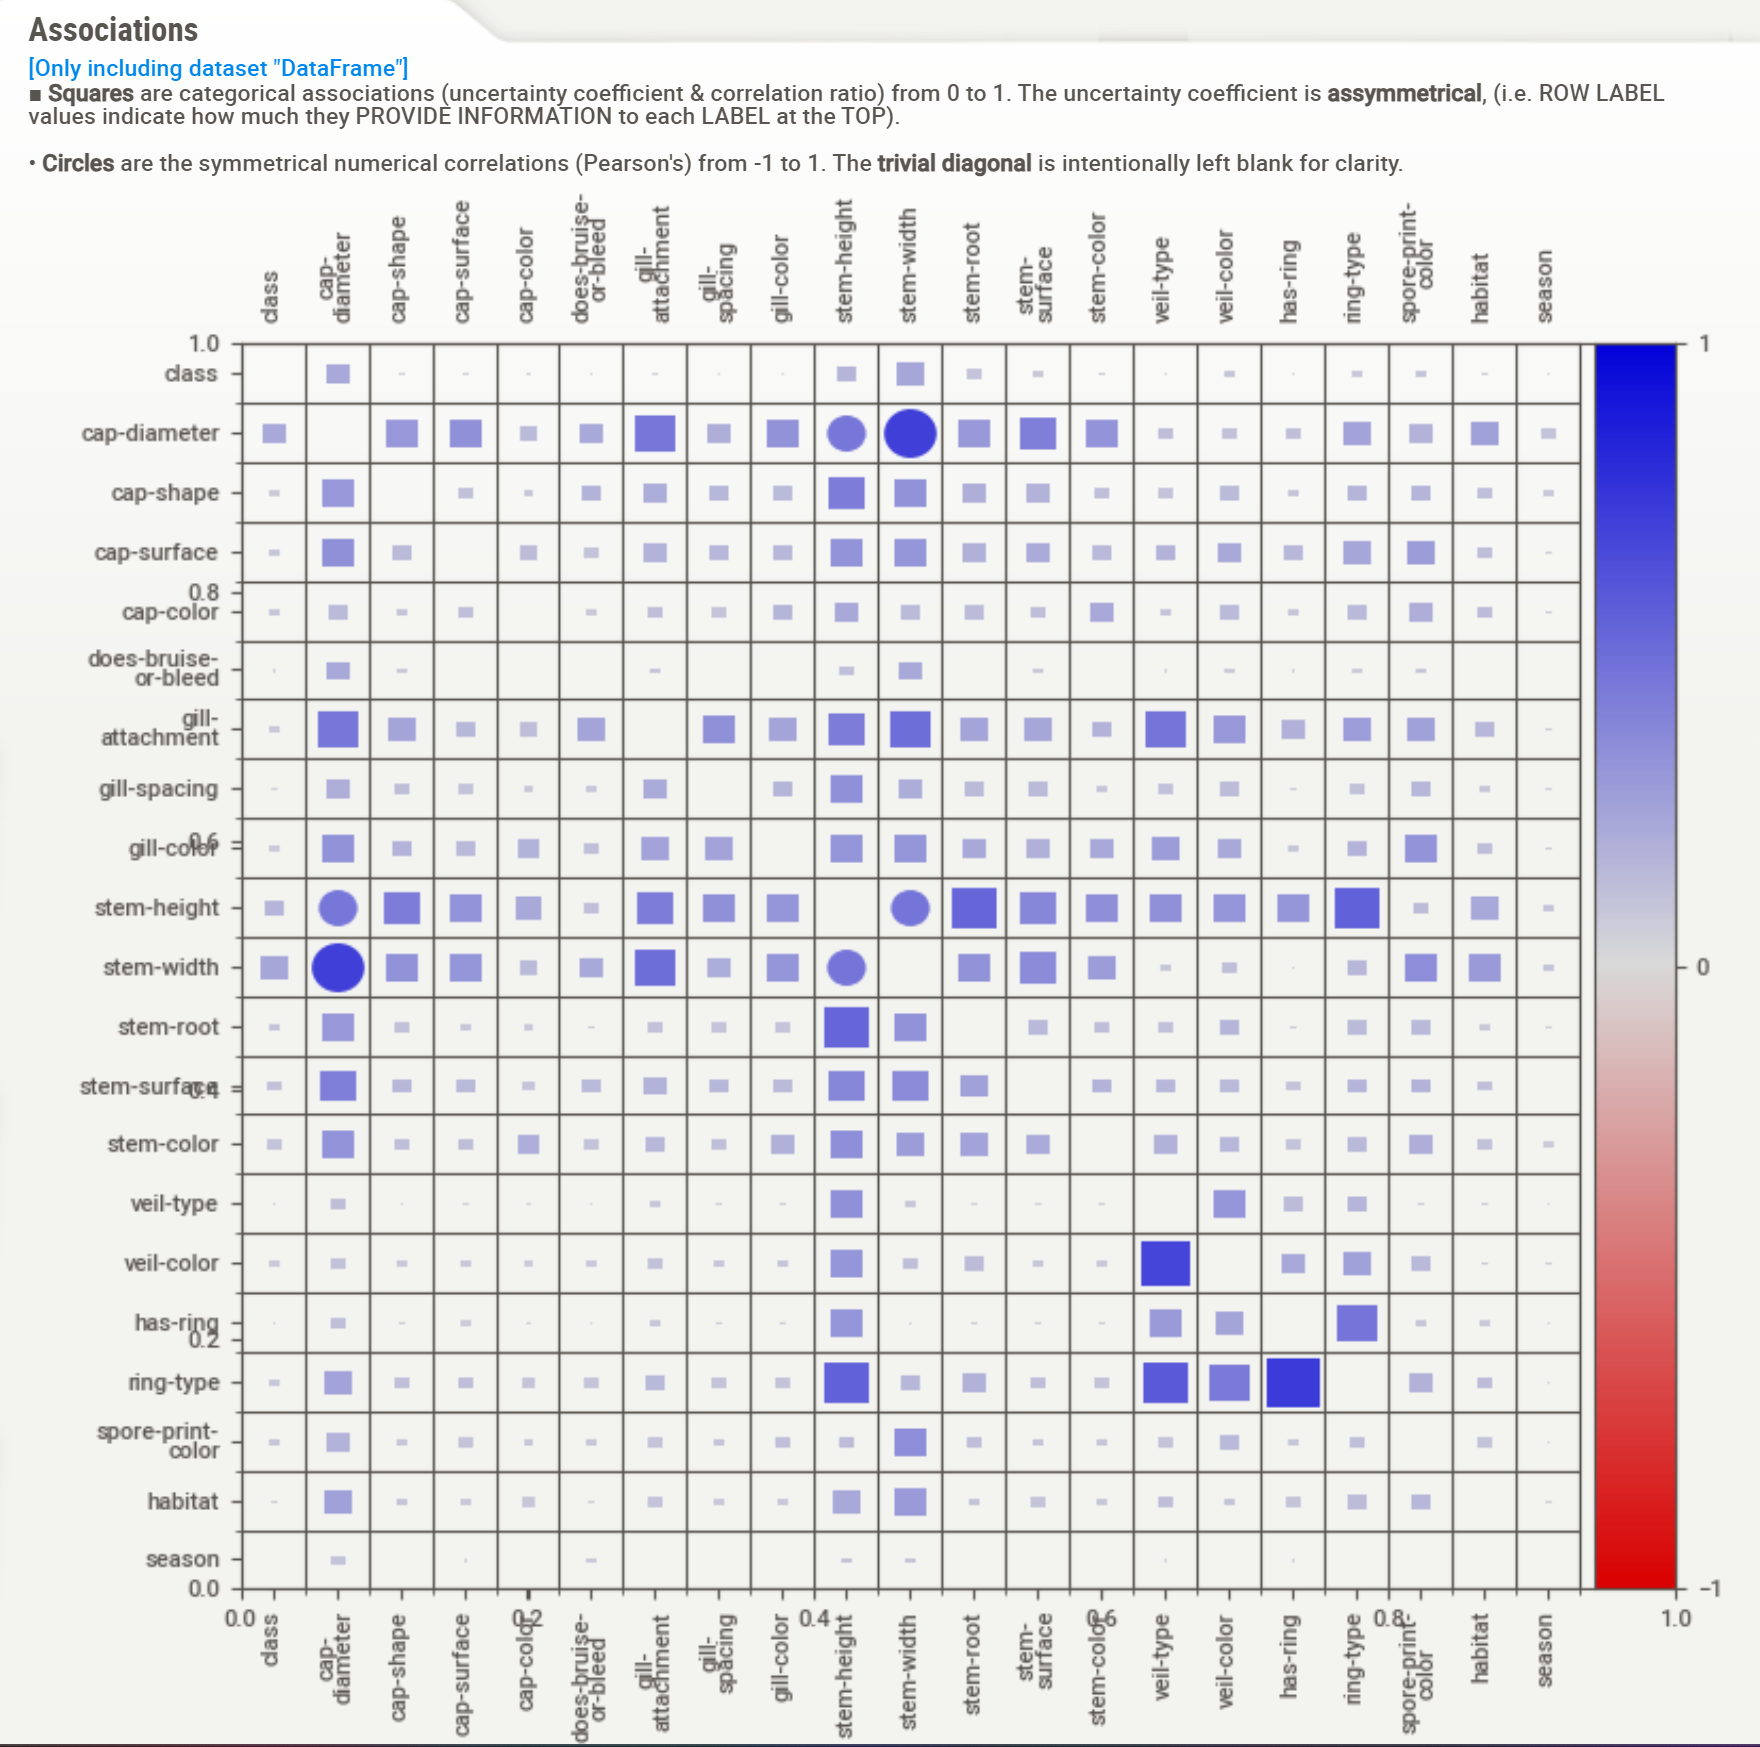

- Widać, że szerokość łodygi skorelowana pozytywnie z szerokoscą kapelusza, sama wyskość łodygi nie aż tak mocno skorelowana
- Widać oczywisye rzeczy jak skorelowanie występowana piersciena z jego typem
- Oraz inne aczkolwiek trzeba zwrócić uwagę, że nie jest tp symetrczune w przypadku kategorycznych

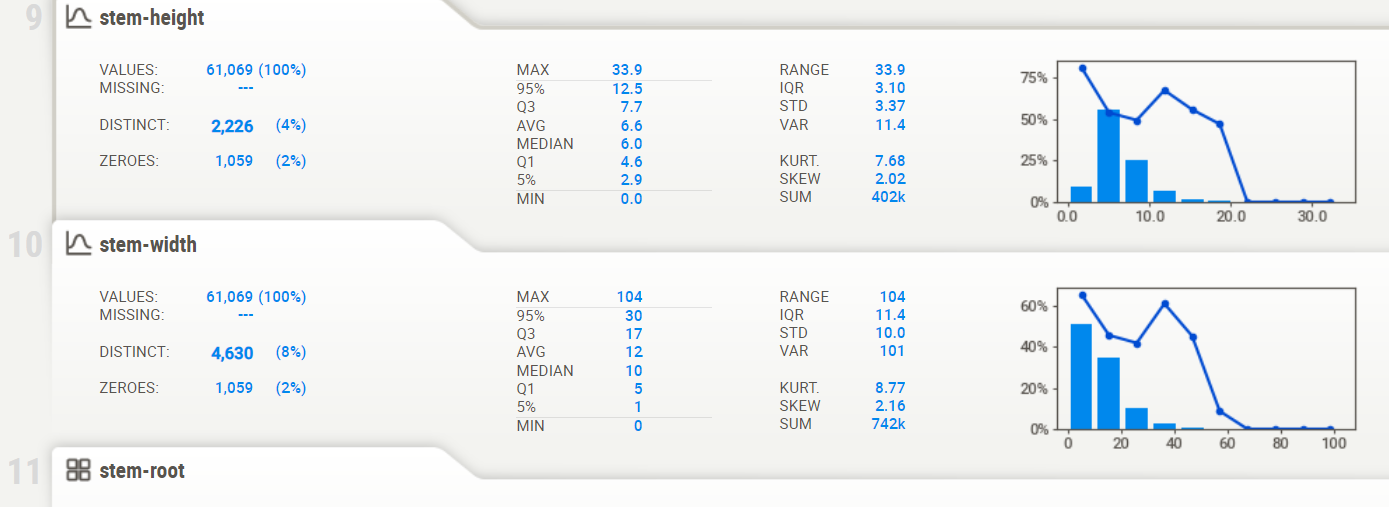
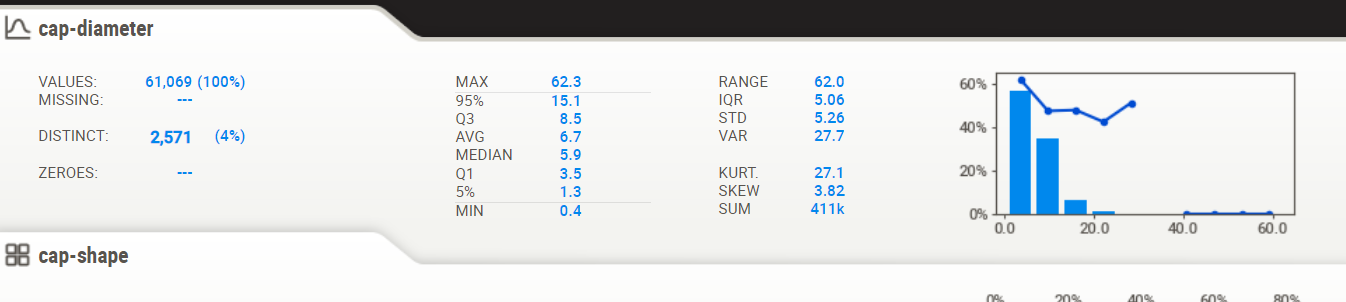
- rozkłady są raczej skośne - mediana do wartości brakujących
- 'Olbrzymie grzyby są rzadkością" :) 

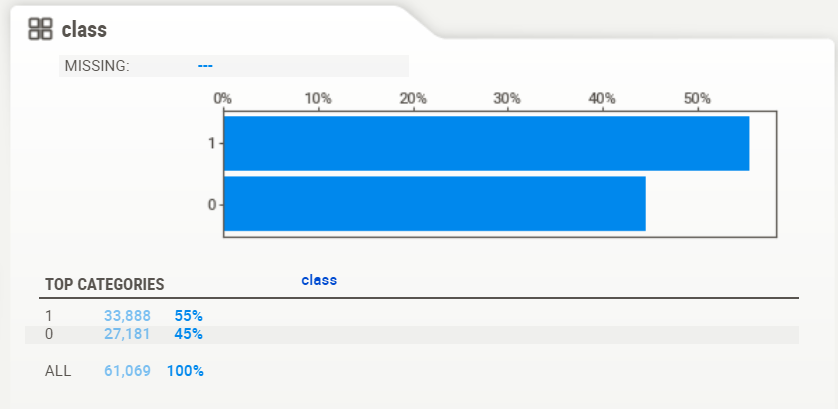
- Klasy są zbalansowane 45 % do 55 %. - ważne że można zbalansować wagi klas w drzewie aby zbiegać w ustaloną dla nas strone...

- Na czerwono widać wartości brakujące danych cech, trzeba się zastanowić, czy wynikają z braku danej cechy jeżeli pytamy o rodzaj?

## Przygotowanie danych do modelowania

### Stratyfikowany poział na zbiór treningowy i testowy

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)


### Przygotownie potoku przetwarzania danych

In [15]:
from sklearn.preprocessing import Binarizer, MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn import set_config

set_config(transform_output="pandas")

to_onehot = [
    "cap-surface",
    "cap-color",
    "cap-surface",
    "cap-color",
    "gill-attachment",
    "gill-spacing",
    "gill-color",
    "stem-root",
    "stem-surface",
    "stem-color",
    "veil-color",
    "ring-type",
    "spore-print-color",
    "habitat",
    "season",
    "does-bruise-or-bleed",
    "has-ring"

]
numeric = ['cap-diameter', 'stem-height', 'stem-width']
missing_col_names = []

def is_missing(df):
    df = pd.concat([df, df.notnull().astype(int).add_suffix("_present")], axis=1)
    return df


onehot = OneHotEncoder(sparse_output=False, dtype=bool)
minmax = MinMaxScaler()

cat_imputer = SimpleImputer(strategy='most_frequent')
num_imputer = SimpleImputer(strategy='median')

preprocessor_steps = []

preprocessor_steps.append(('missing_indicator', FunctionTransformer(func=is_missing)))

cat_tranformer = Pipeline(steps=[
    ('imputer', cat_imputer),
    ('onehot', onehot)
])

numeric_transformer = Pipeline(steps=[
    ('imputer', num_imputer),
    # ('minmax', minmax)
])

column_transformer = ColumnTransformer(
    [
        ('categorical', cat_tranformer, to_onehot),
        ('numeric', numeric_transformer, numeric)
    ],
)

preprocessor_steps.append(('column_transformer', column_transformer))

preprocessor = Pipeline(steps=preprocessor_steps)

In [16]:
preprocessor

Pipeline(steps=[('missing_indicator',
                 FunctionTransformer(func=<function is_missing at 0x000001B724DBBE20>)),
                ('column_transformer',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(dtype=<class 'bool'>,
                                                                                 sparse_output=False))]),
                                                  ['cap-surface', 'cap-color',
                                                   'cap-surface', 'cap-color',
                                                   'gill-attachment',
                                                   'gill-spacing', 'gill-color',
                                                   'stem-root', 'stem-surface',
                                                   'stem-color', 'veil-color',
                                                   'ring-type',
                                                   'spore-print-color',
                                                   'habitat', 'season',
                                                   'does-bruise-or-bleed',
                                                   'has-ring']),
                                                 ('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['cap-diameter',
                                                   'stem-height',
                                                   'stem-width'])]))])

## Trening modeli z wykorzystaniem przeszukiwania hiperparametrów modelu.

Metoda analizy wybranego drzewa decyzyjnego

In [17]:
from sklearn.metrics import classification_report
from IPython.display import SVG
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import tree
import graphviz
import matplotlib.pyplot as plt
import seaborn as sns

def decision_tree_analysis(name ,model, X_test, y_test):

    features = model.named_steps["dt"].feature_names_in_
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    # Print the classification report
    cr = classification_report(y_test, y_pred, output_dict=True)
    # Plot the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # disp.plot()

    # Get the feature importances
    importances = model.named_steps["dt"].feature_importances_

    # Get the feature names
    feature_names = features

    # Create a DataFrame
    feature_importances = pd.DataFrame(
        {"feature": feature_names, "importance": importances}
    )

    # Sort values
    feature_importances = feature_importances.sort_values("importance", ascending=True)

    # make a plot instance but not show it
    # fig, ax = plt.subplots()
    # feature_importances.plot.barh(x="feature", y="importance", ax=ax)
    # plt.title("Feature Importances")
    # plt.xlabel("Importance")
    # plt.ylabel("Feature")
    # plt.tight_layout()
    # plt.savefig(name + "_feature_importances.png")


    # expoert tree to svg
    dot_data = tree.export_graphviz(
        model["dt"],
        out_file=None,
        feature_names=features,
        class_names=["edible", "poisonous"],
        filled=True,
        rounded=True,
        special_characters=True,
    )
    graph = graphviz.Source(dot_data)
    graph.render(name, format="svg")

    # get tree instance and print stats
    tree_instance = model["dt"].tree_
    # print(f"Number of nodes: {tree_instance.node_count}")
    # print(f"Depth of the tree: {tree_instance.max_depth}")
    # print(f"Average depth: {tree_instance.node_count / tree_instance.max_depth}")
    return cr, cm, feature_importances, graph, tree_instance

In [18]:
def show_classification_report(cr, name):
    fig, ax = plt.subplots(figsize=(5, 5))
    sns.heatmap(
        pd.DataFrame(cr).iloc[:-1, :].T,
        annot=True,
        cmap="viridis",
        fmt=".4f",
        linewidths=0.5,
        linecolor="black",
        ax=ax,
        vmax=1,
        vmin=0,
    )
    ax.set_title(name + " Classification Report")
    plt.show()

    return ax

In [19]:
def show_confusion_matrics(cm, name, model):
    fig, ax = plt.subplots(figsize=(5, 5))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(ax=ax)
    plt.title(name + " Confusion Matrix")


In [20]:
def show_feature_importances(fi, name):
    fig, ax = plt.subplots(figsize=(10, 20))
    fi.plot.barh(x="feature", y="importance", ax=ax)
    plt.title(name + " Feature Importances")
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.tight_layout()
    plt.show()

In [21]:
def show_tree_stats(tree, name, verbose=True):
    if verbose:
        print(f"Number of nodes: {tree.node_count}")
        print(f"Depth of the tree: {tree.max_depth}")
        print(f"Average depth: {tree.node_count / tree.max_depth}")
    #show barplot of stats
    stats = pd.DataFrame({"Number of nodes": [tree.node_count], "Depth of the tree": [tree.max_depth], "Average depth": [tree.node_count / tree.max_depth], "Name" : name})
    if verbose:
        stats.plot.barh()
        plt.title(name + " Tree Stats")
        plt.show()
    return stats


Wytrenowanie modeli drzew decyzyjnych [2, 3] z wykorzystaniem przeszukiwania
 hiperparametrów (np. GridSearch [5]) oraz dobraniem odpowiedniej miary
 klasyfikacji. Sugerowane 4 hiperparametry: criterion, max_depth, min_samples_leaf,
 cpp_alpha. W szczególności zwróć uwagę na pruning (cpp_alpha). Analiza wpływu
 hiperparametrów na jakość wyników

Wizualizacja drzewa oraz analiza drzew dla różnych hiperparametrów. (“Jak różnią
 się wynikowe drzewa pod wpływem różnych zestawów hiperparametrów?”)

In [22]:
from sklearn.experimental import enable_halving_search_cv

from sklearn.model_selection import HalvingGridSearchCV, GridSearchCV

param_grid = {
    "dt__criterion": ["gini", "entropy"],
    "dt__max_depth": [None, 5, 10, 15, 30],
    "dt__min_samples_leaf": [1, 100, 1000],
    "dt__ccp_alpha": [0.0, 0.001, 0.005],
}

dt_classifier = DecisionTreeClassifier(random_state=42)
model = Pipeline(
    [
        ("preprocessor", preprocessor),
        ("dt", dt_classifier),
    ]
)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# Create the decision tree classifier

# Create the GridSearchCV object
grid_search = HalvingGridSearchCV(model, param_grid, cv=skf, n_jobs=-1, verbose=2, scoring='f1_macro')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

print(best_params)

c:\Users\filip\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


n_iterations: 5
n_required_iterations: 5
n_possible_iterations: 5
min_resources_: 603
max_resources_: 48855
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 90
n_resources: 603
Fitting 5 folds for each of 90 candidates, totalling 450 fits


c:\Users\filip\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:1051: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


----------
iter: 1
n_candidates: 30
n_resources: 1809
Fitting 5 folds for each of 30 candidates, totalling 150 fits


c:\Users\filip\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:1051: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


----------
iter: 2
n_candidates: 10
n_resources: 5427
Fitting 5 folds for each of 10 candidates, totalling 50 fits


c:\Users\filip\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:1051: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan

----------
iter: 3
n_candidates: 4
n_resources: 16281
Fitting 5 folds for each of 4 candidates, totalling 20 fits


c:\Users\filip\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:1051: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan

----------
iter: 4
n_candidates: 2
n_resources: 48843
Fitting 5 folds for each of 2 candidates, totalling 10 fits


c:\Users\filip\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:1051: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan

{'dt__ccp_alpha': 0.0, 'dt__criterion': 'gini', 'dt__max_depth': None, 'dt__min_samples_leaf': 100}


## Analiza drzewa stworzonego z wykorzystaniem najlepszych hiperparametrów

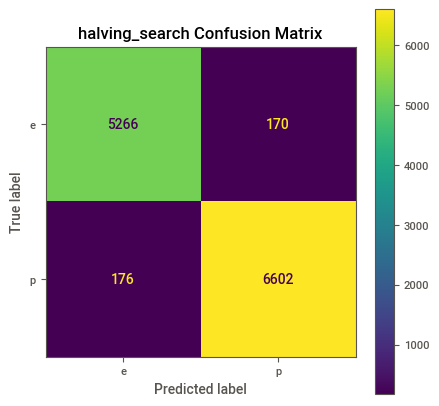

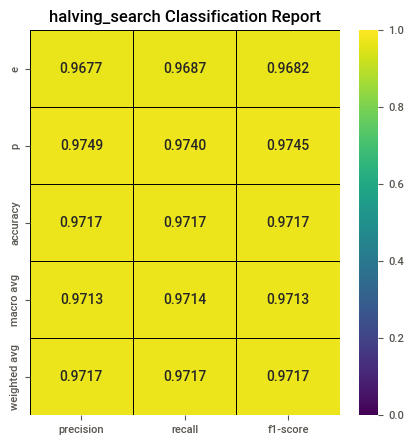

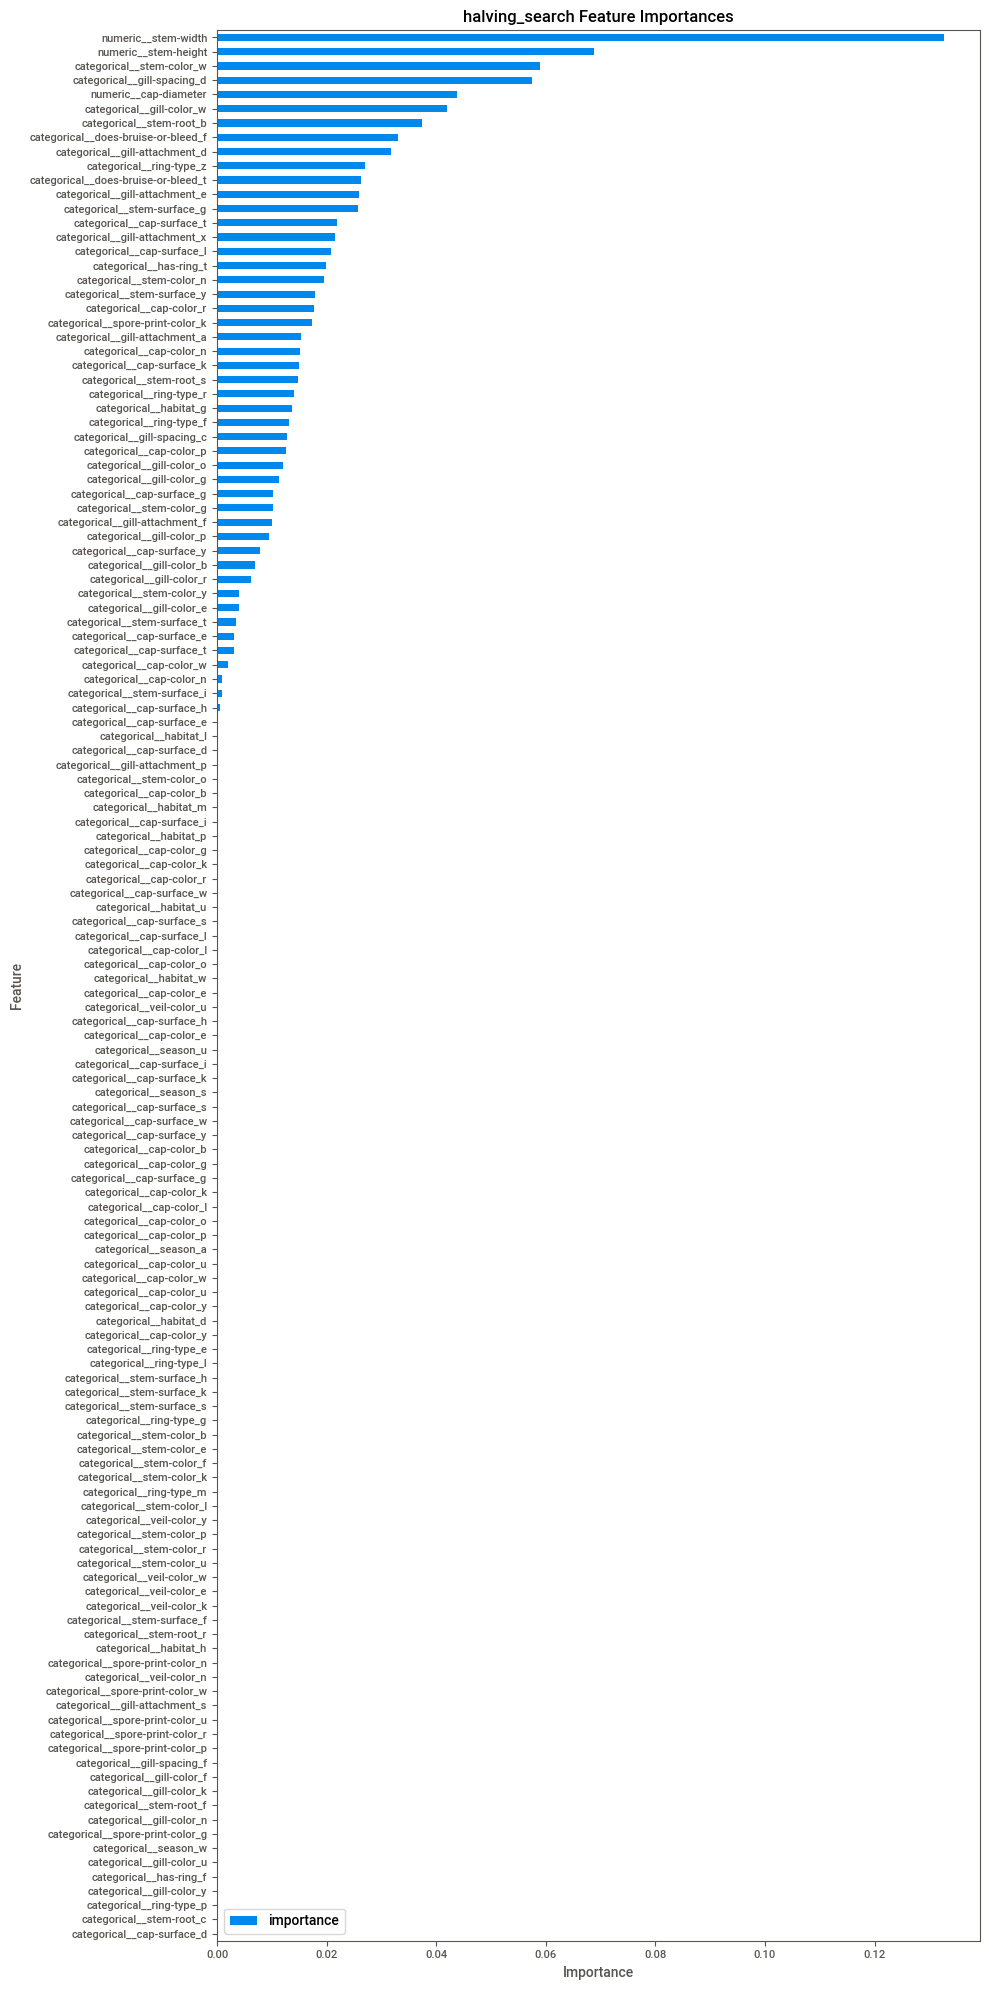

Number of nodes: 287
Depth of the tree: 24
Average depth: 11.958333333333334


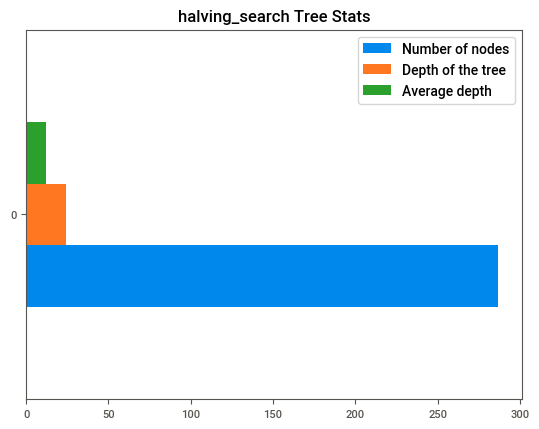

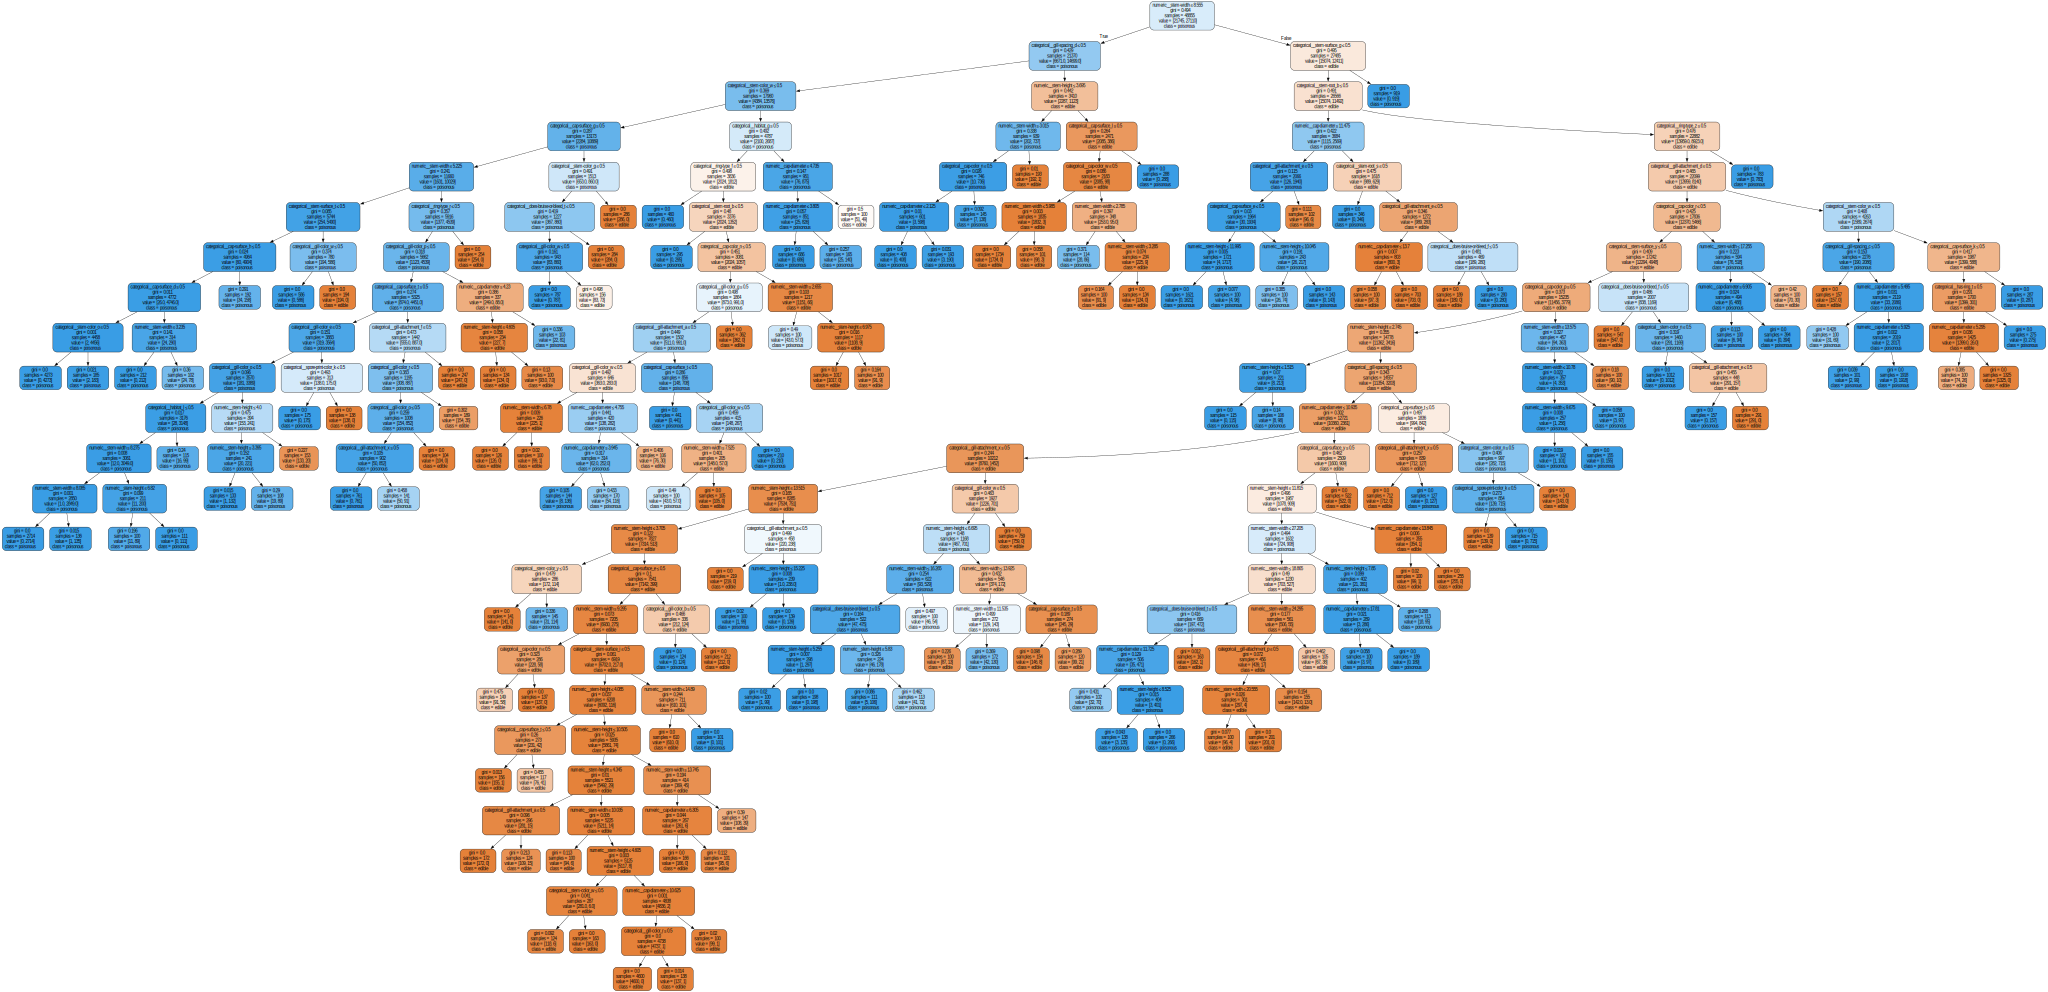

In [23]:
best_model = grid_search.best_estimator_

best_cr, best_cm, best_fi, best_graph, best_tree = decision_tree_analysis("halving_search", best_model, X_test, y_test)

show_confusion_matrics(best_cm, "halving_search", best_model.named_steps["dt"])
show_classification_report(best_cr, "halving_search")
show_feature_importances(best_fi, "halving_search")
show_tree_stats(best_tree, "halving_search")
SVG(best_graph.pipe(format="svg"))

## Analiza wpływu maksymalnej głębokości drzewa na wyniki klasyfikacji.

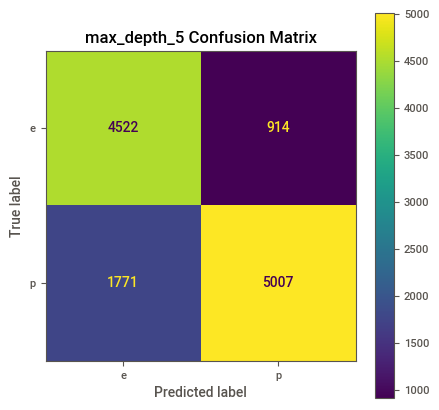

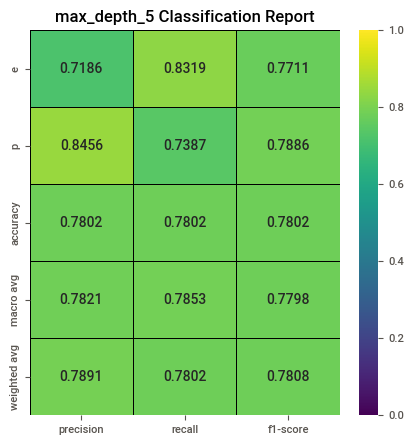

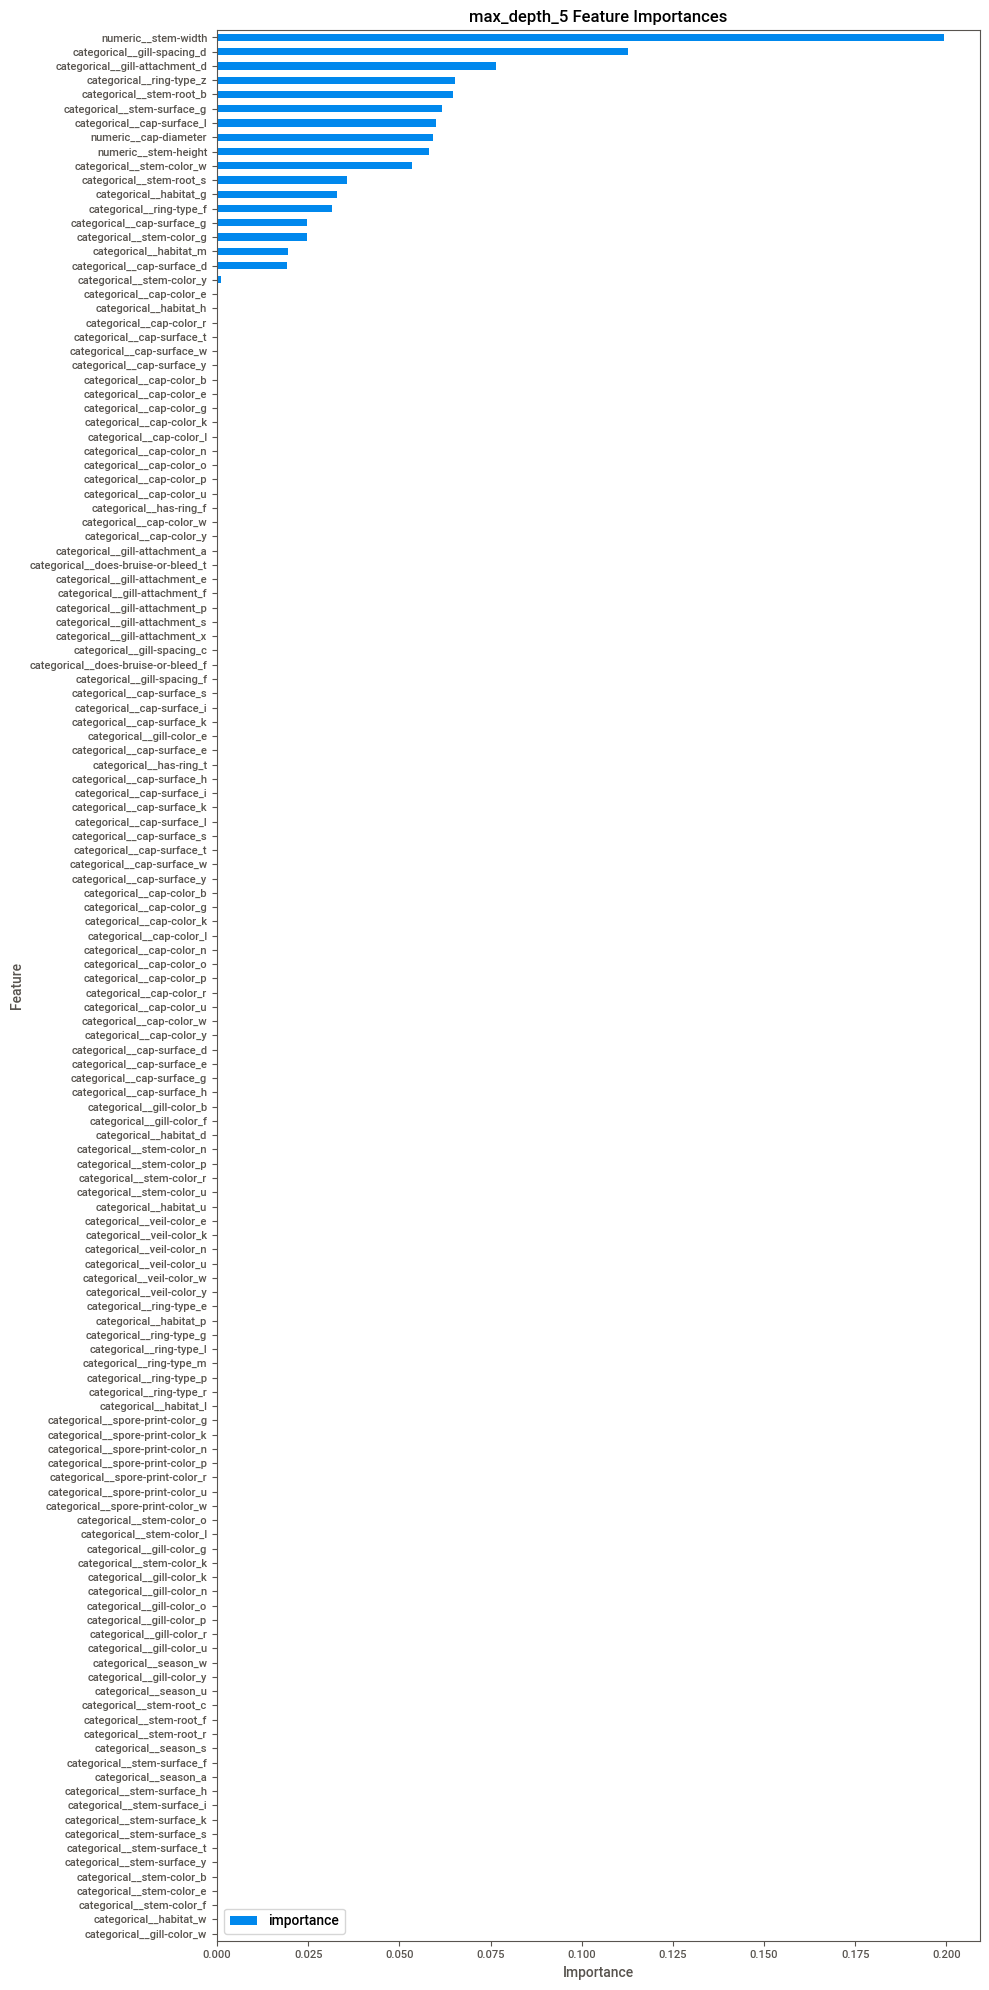

Number of nodes: 45
Depth of the tree: 5
Average depth: 9.0


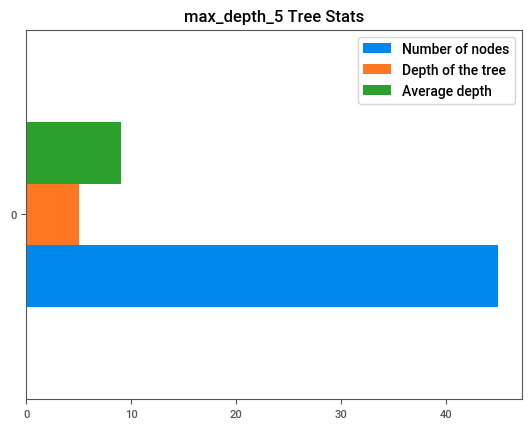

array(['categorical__cap-surface_d', 'categorical__cap-surface_e',
       'categorical__cap-surface_g', 'categorical__cap-surface_h',
       'categorical__cap-surface_i', 'categorical__cap-surface_k',
       'categorical__cap-surface_l', 'categorical__cap-surface_s',
       'categorical__cap-surface_t', 'categorical__cap-surface_w',
       'categorical__cap-surface_y', 'categorical__cap-color_b',
       'categorical__cap-color_e', 'categorical__cap-color_g',
       'categorical__cap-color_k', 'categorical__cap-color_l',
       'categorical__cap-color_n', 'categorical__cap-color_o',
       'categorical__cap-color_p', 'categorical__cap-color_r',
       'categorical__cap-color_u', 'categorical__cap-color_w',
       'categorical__cap-color_y', 'categorical__cap-surface_d',
       'categorical__cap-surface_e', 'categorical__cap-surface_g',
       'categorical__cap-surface_h', 'categorical__cap-surface_i',
       'categorical__cap-surface_k', 'categorical__cap-surface_l',
       'categorical

In [24]:
# make a tree with 5 max depth
dt_classifier = DecisionTreeClassifier(random_state=42, max_depth=5)
model = Pipeline(
    [
        ("preprocessor", preprocessor),
        ("dt", dt_classifier),
    ]
)


# normal fit
model.fit(X_train, y_train)

max_depth_5_cr, max_depth_5_cm, max_depth_5_fi, max_depth_5_graph, max_depth_5_tree = decision_tree_analysis("max_depth_5", model, X_test, y_test)

show_confusion_matrics(max_depth_5_cm, "max_depth_5", model.named_steps["dt"])

show_classification_report(max_depth_5_cr, "max_depth_5")

show_feature_importances(max_depth_5_fi, "max_depth_5")

show_tree_stats(max_depth_5_tree, "max_depth_5")

SVG(max_depth_5_graph.pipe(format="svg"))
model.named_steps["dt"].feature_names_in_

In [25]:
model.named_steps["dt"].feature_names_in_

array(['categorical__cap-surface_d', 'categorical__cap-surface_e',
       'categorical__cap-surface_g', 'categorical__cap-surface_h',
       'categorical__cap-surface_i', 'categorical__cap-surface_k',
       'categorical__cap-surface_l', 'categorical__cap-surface_s',
       'categorical__cap-surface_t', 'categorical__cap-surface_w',
       'categorical__cap-surface_y', 'categorical__cap-color_b',
       'categorical__cap-color_e', 'categorical__cap-color_g',
       'categorical__cap-color_k', 'categorical__cap-color_l',
       'categorical__cap-color_n', 'categorical__cap-color_o',
       'categorical__cap-color_p', 'categorical__cap-color_r',
       'categorical__cap-color_u', 'categorical__cap-color_w',
       'categorical__cap-color_y', 'categorical__cap-surface_d',
       'categorical__cap-surface_e', 'categorical__cap-surface_g',
       'categorical__cap-surface_h', 'categorical__cap-surface_i',
       'categorical__cap-surface_k', 'categorical__cap-surface_l',
       'categorical

## Wpływ innej metryki na wyniki klasyfikacji.

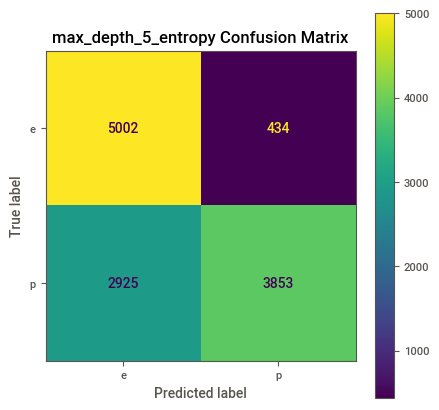

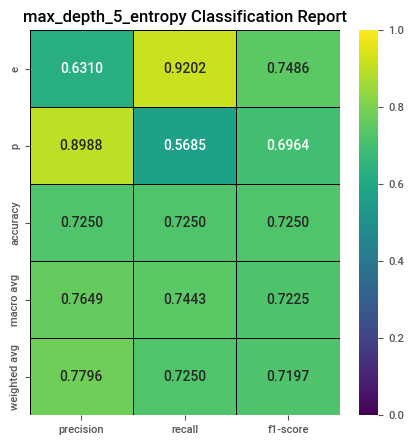

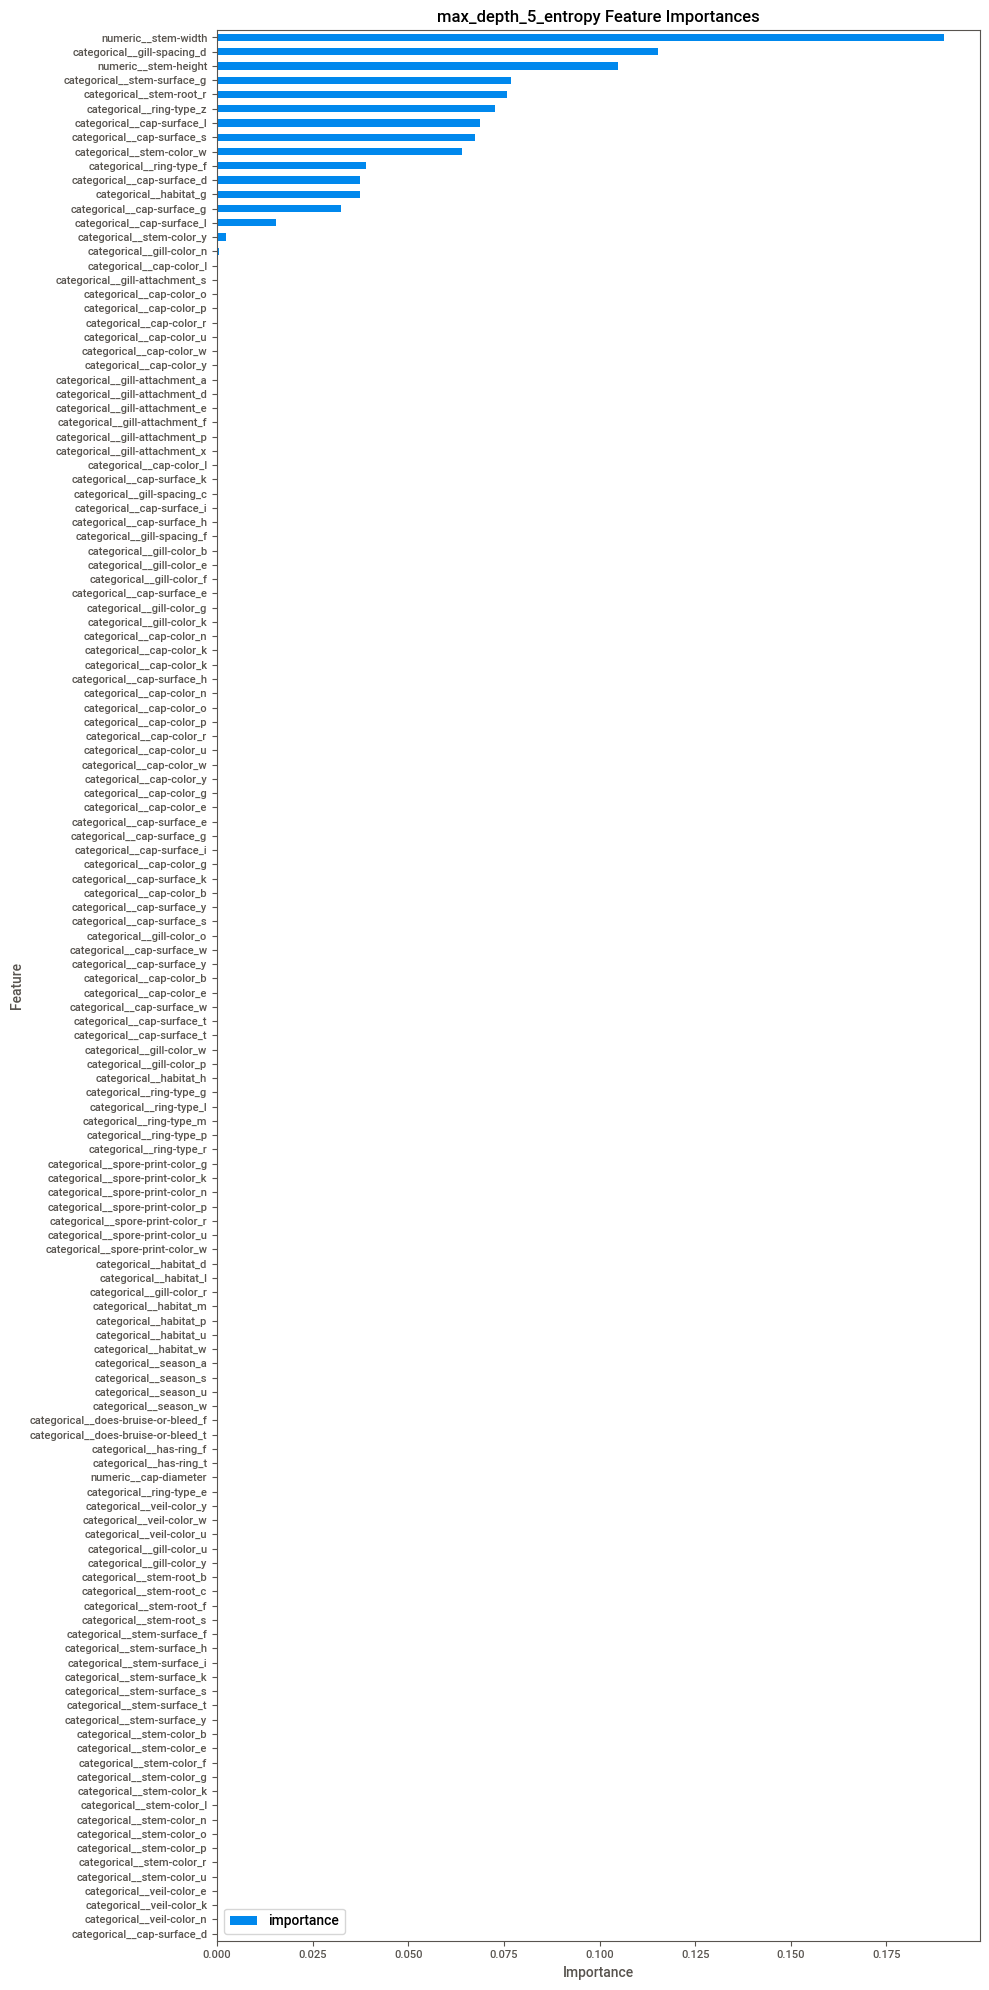

Number of nodes: 39
Depth of the tree: 5
Average depth: 7.8


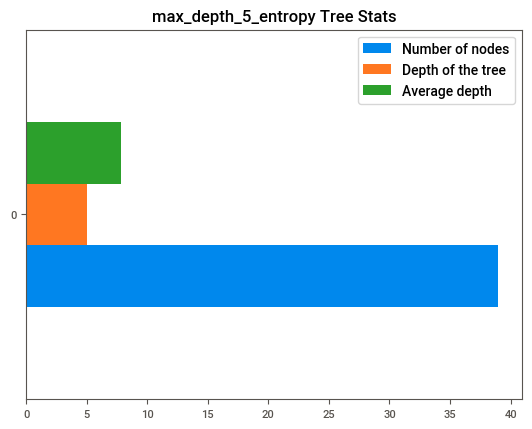

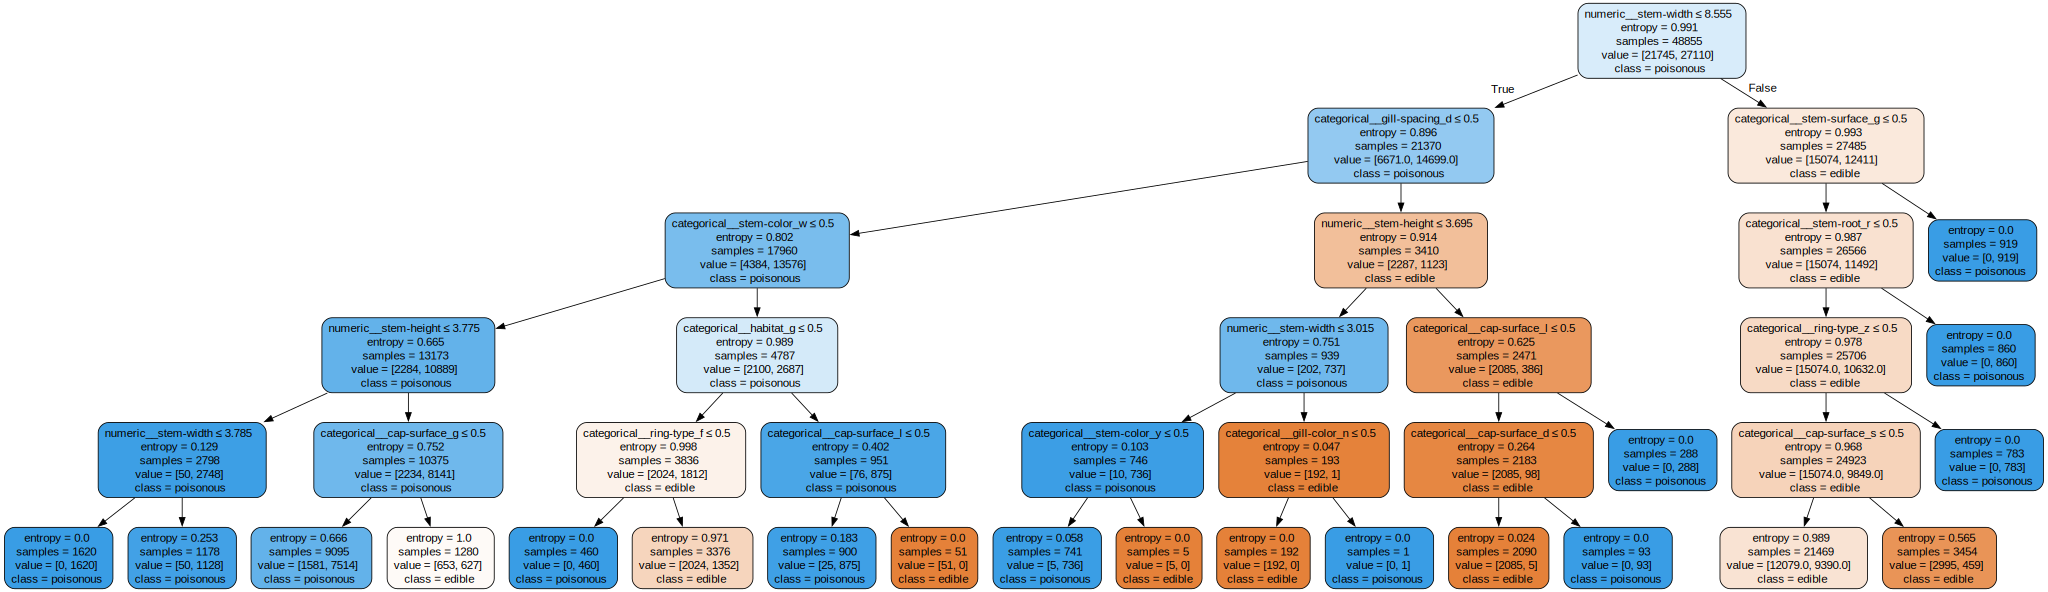

In [26]:
dt_classifier = DecisionTreeClassifier(random_state=42, max_depth=5, criterion='entropy')
model = Pipeline(
    [
        ("preprocessor", preprocessor),
        ("dt", dt_classifier),
    ]
)

# normal fit
model.fit(X_train, y_train)


max_depth_5_entropy_cr, max_depth_5_entropy_cm, max_depth_5_entropy_fi, max_depth_5_entropy_graph, max_depth_5_entropy_tree = decision_tree_analysis("max_depth_5_entropy", model, X_test, y_test)

show_confusion_matrics(max_depth_5_entropy_cm, "max_depth_5_entropy", model.named_steps["dt"])
show_classification_report(max_depth_5_entropy_cr, "max_depth_5_entropy")
show_feature_importances(max_depth_5_entropy_fi, "max_depth_5_entropy")
show_tree_stats(max_depth_5_entropy_tree, "max_depth_5_entropy")
SVG(max_depth_5_entropy_graph.pipe(format="svg"))


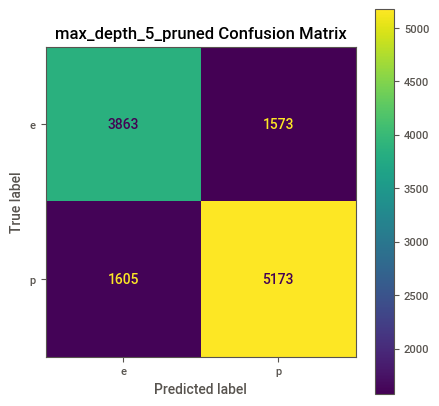

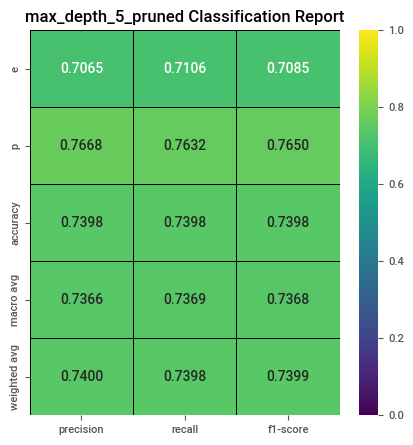

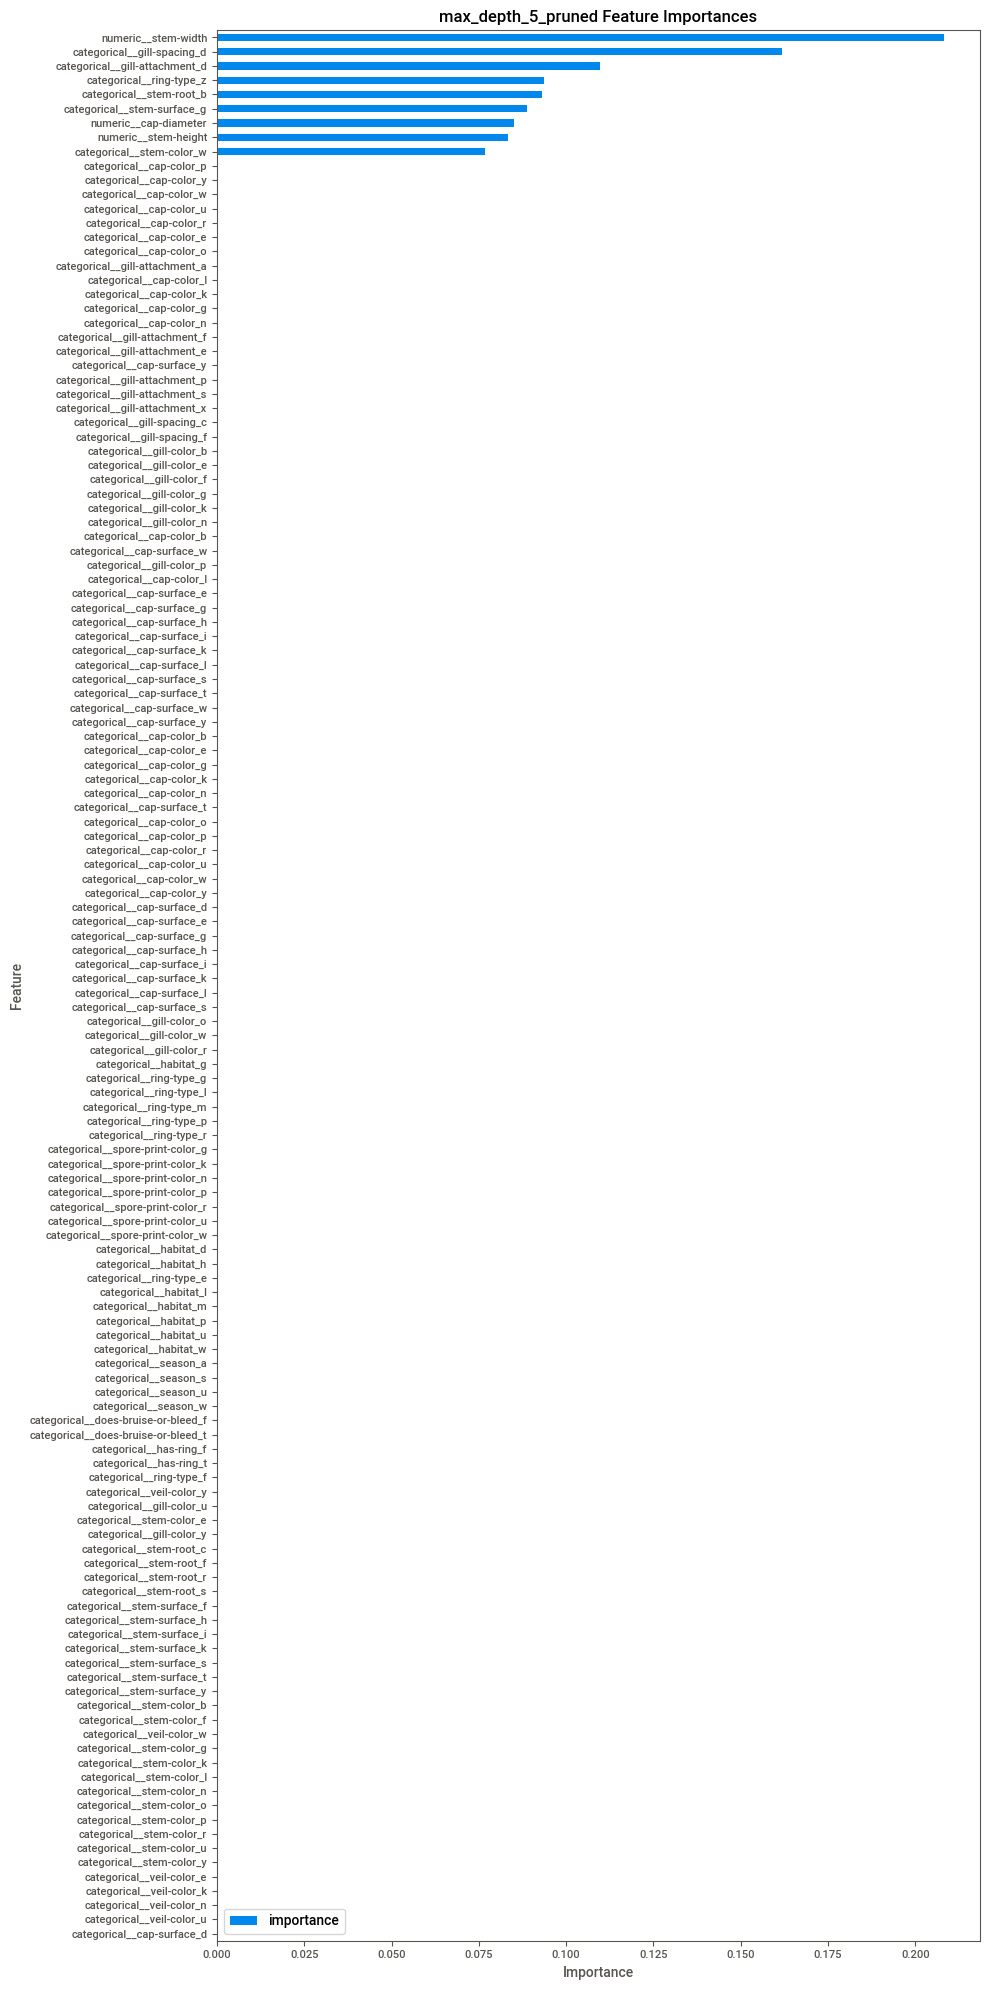

Number of nodes: 19
Depth of the tree: 5
Average depth: 3.8


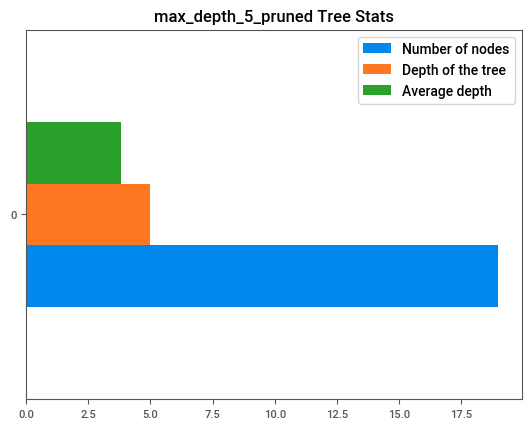

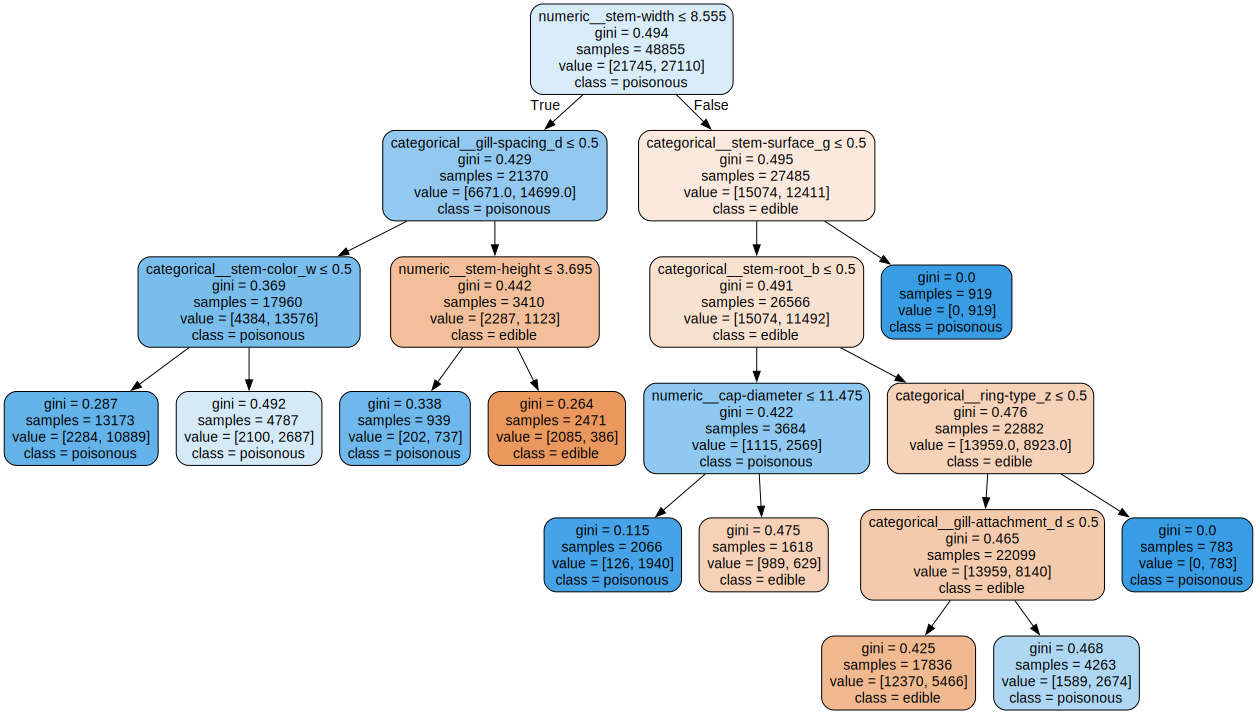

In [27]:
# 5 max depth and high pruning
dt_classifier = DecisionTreeClassifier(random_state=42, max_depth=5, ccp_alpha=0.01)
model = Pipeline(
    [
        ("preprocessor", preprocessor),
        ("dt", dt_classifier),
    ]
)

# normal fit
model.fit(X_train, y_train)

# show the tree
max_depth_5_pruned_cr, max_depth_5_pruned_cm, max_depth_5_pruned_fi, max_depth_5_pruned_graph, max_depth_5_pruned_tree = decision_tree_analysis("max_depth_5_pruned", model, X_test, y_test)

show_confusion_matrics(max_depth_5_pruned_cm, "max_depth_5_pruned", model.named_steps["dt"])

show_classification_report(max_depth_5_pruned_cr, "max_depth_5_pruned")

show_feature_importances(max_depth_5_pruned_fi, "max_depth_5_pruned")

show_tree_stats(max_depth_5_pruned_tree, "max_depth_5_pruned")

SVG(max_depth_5_pruned_graph.pipe(format="svg"))


## Zbadanie jak użycie parametru min_samples_leaf wpływa na wyniki klasyfikacji.

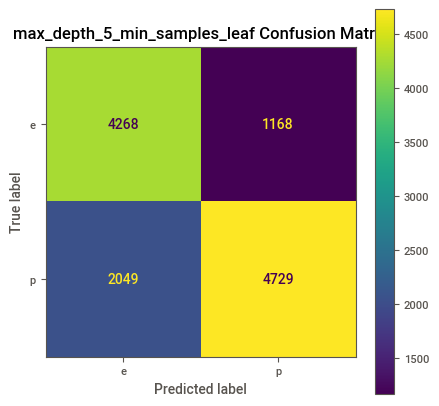

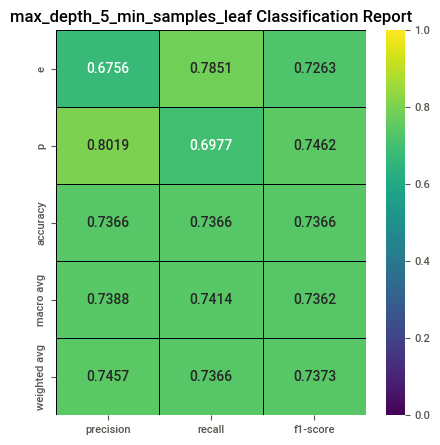

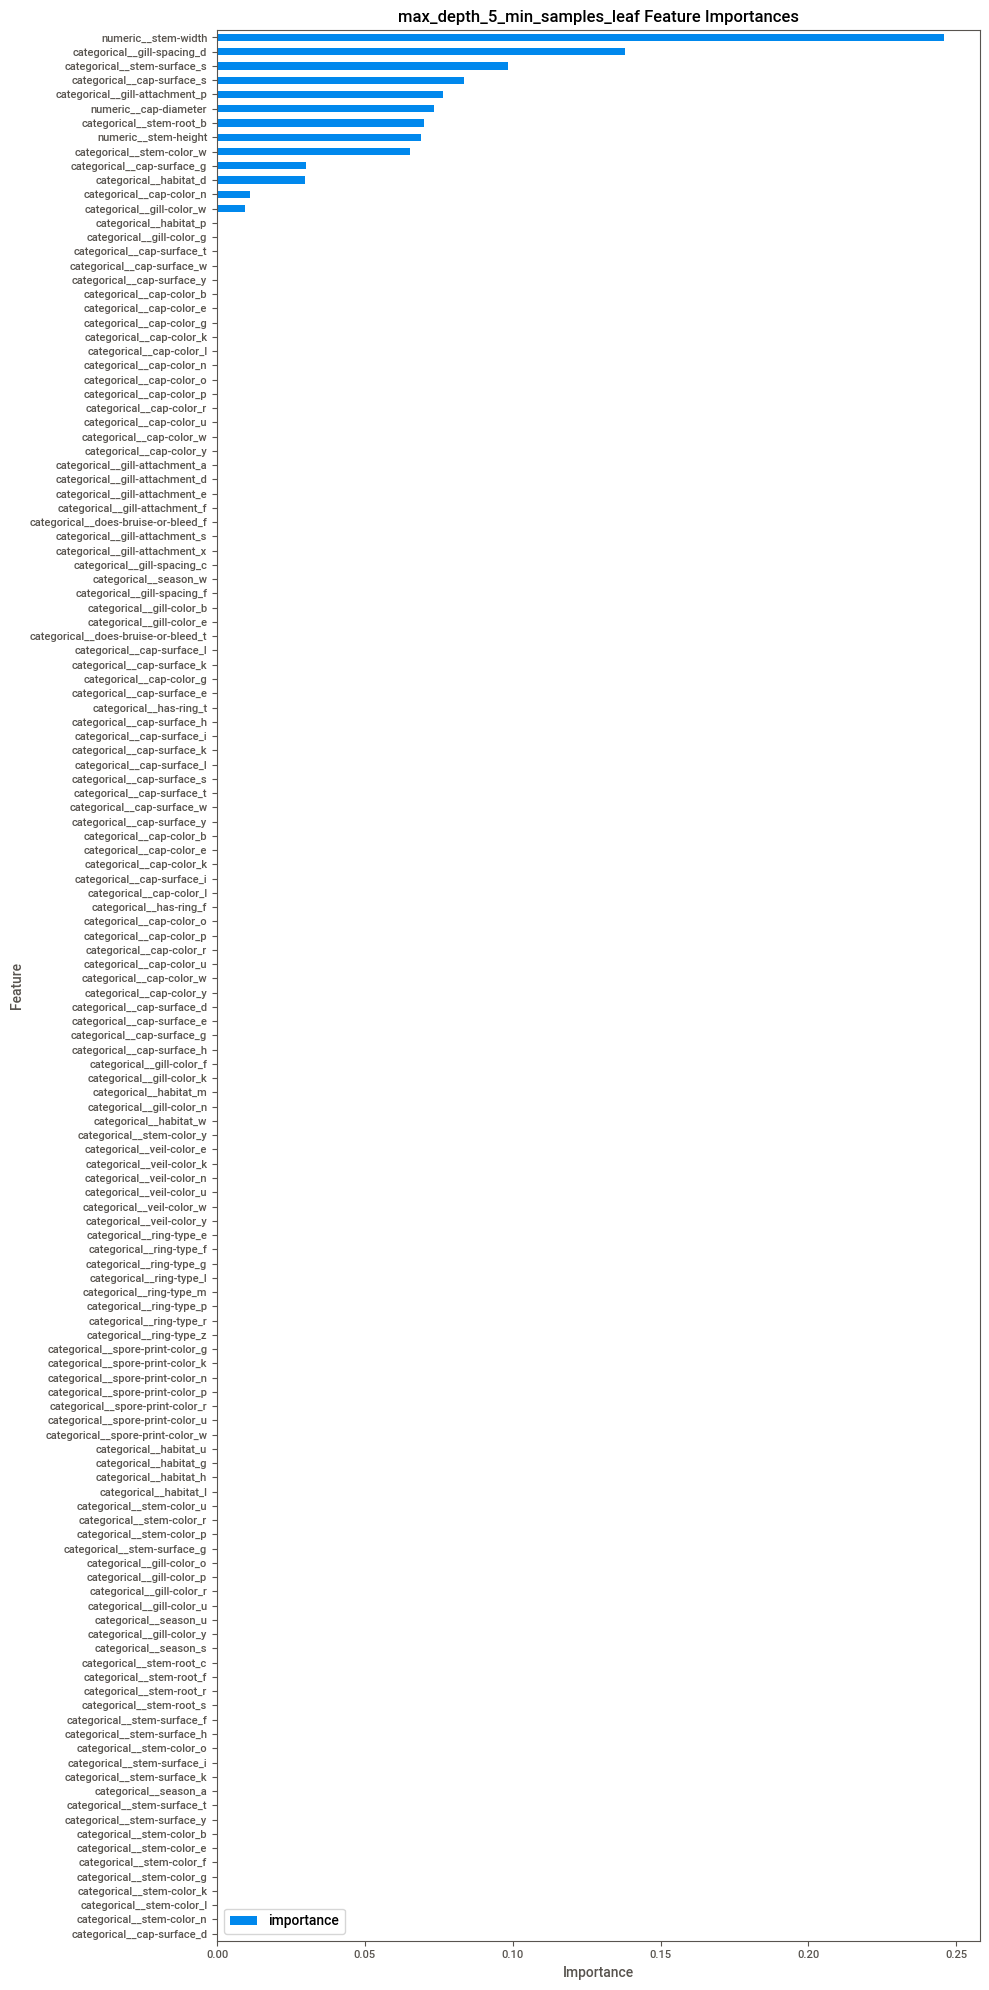

Number of nodes: 37
Depth of the tree: 5
Average depth: 7.4


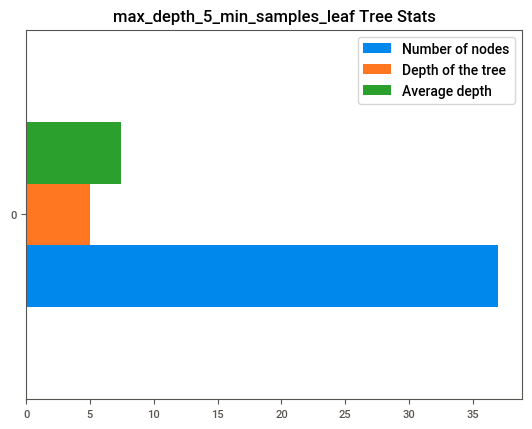

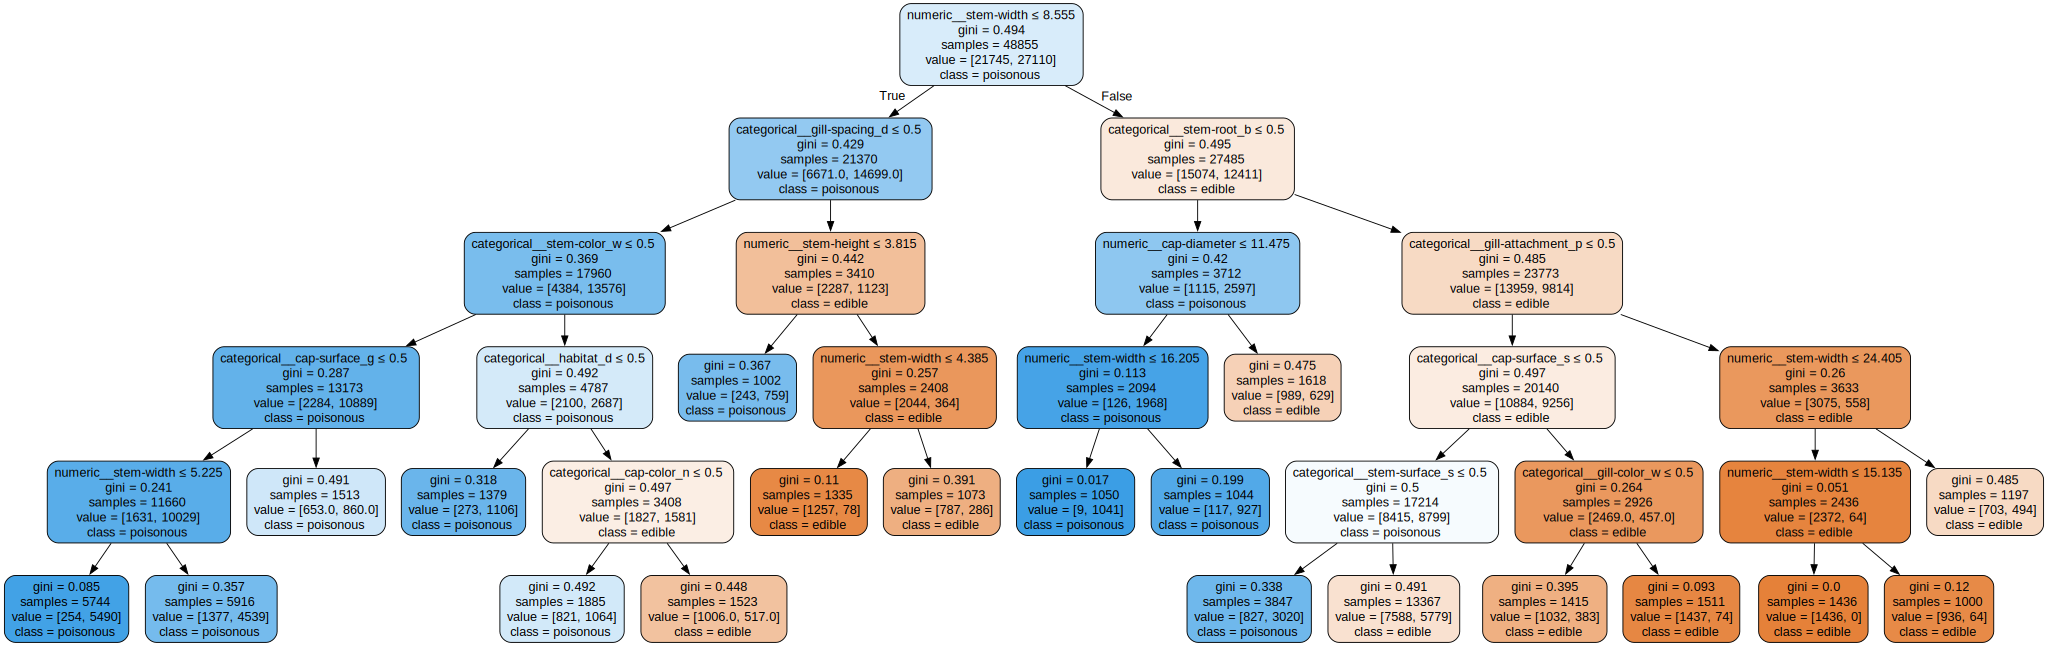

In [28]:
dt_classifier = DecisionTreeClassifier(random_state=42, max_depth=5, min_samples_leaf=1000)
model = Pipeline(
    [
        ("preprocessor", preprocessor),
        ("dt", dt_classifier),
    ]
)

# normal fit
model.fit(X_train, y_train)

# show the tree
max_depth_5_min_samples_leaf_cr, max_depth_5_min_samples_leaf_cm, max_depth_5_min_samples_leaf_fi, max_depth_5_min_samples_leaf_graph, max_depth_5_min_samples_leaf_tree = decision_tree_analysis("max_depth_5_min_samples_leaf", model, X_test, y_test)

show_confusion_matrics(max_depth_5_min_samples_leaf_cm, "max_depth_5_min_samples_leaf", model.named_steps["dt"])

show_classification_report(max_depth_5_min_samples_leaf_cr, "max_depth_5_min_samples_leaf")

show_feature_importances(max_depth_5_min_samples_leaf_fi, "max_depth_5_min_samples_leaf")

show_tree_stats(max_depth_5_min_samples_leaf_tree, "max_depth_5_min_samples_leaf")

SVG(max_depth_5_min_samples_leaf_graph.pipe(format="svg"))

## Minimalna liczba próbek w liściu

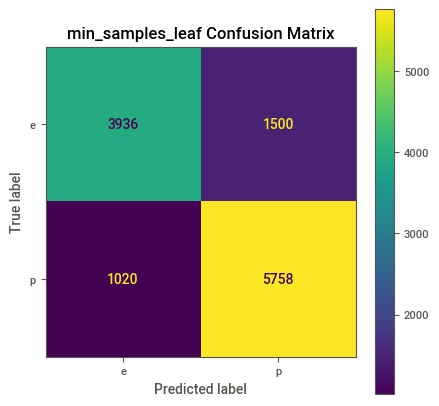

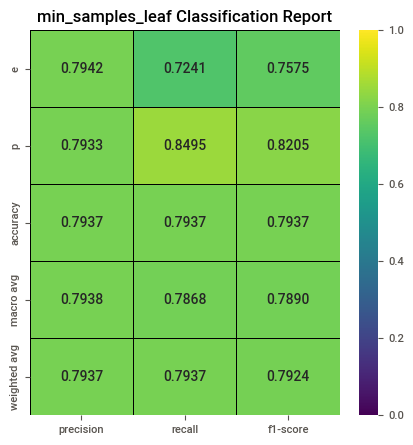

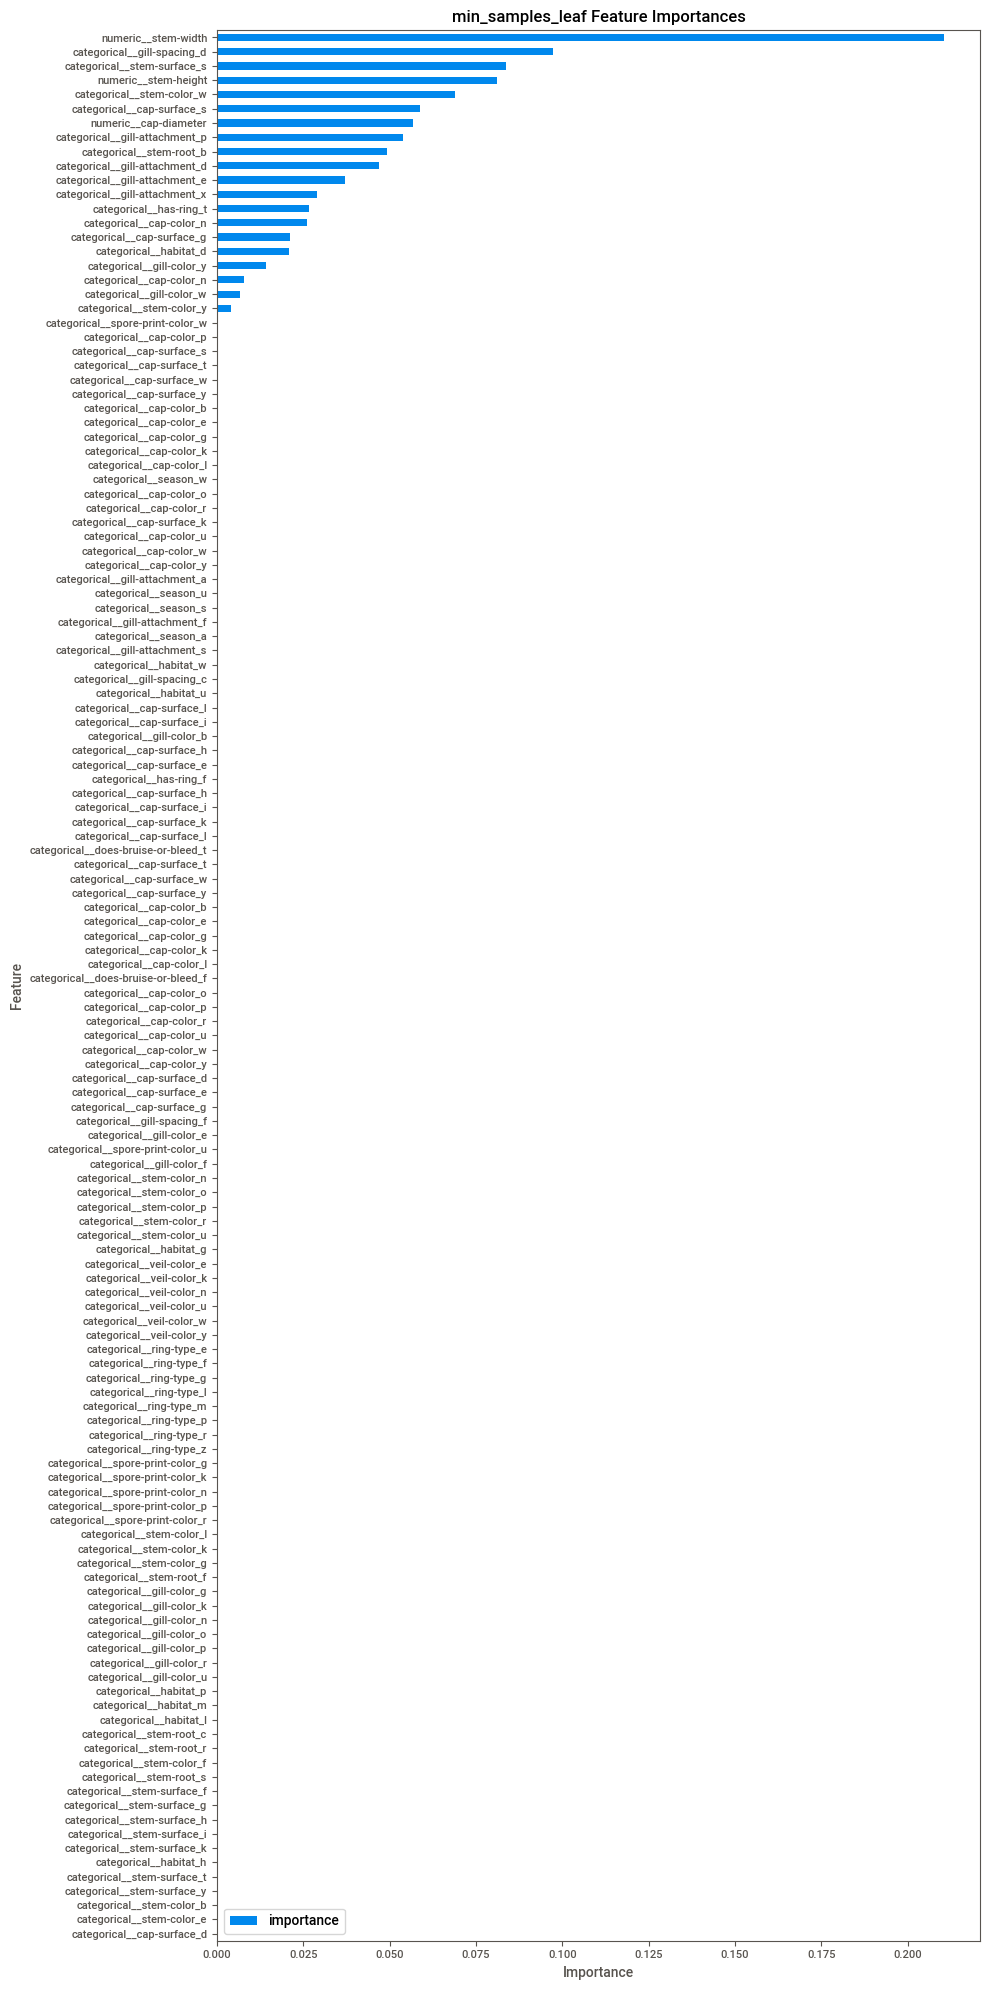

Number of nodes: 71
Depth of the tree: 10
Average depth: 7.1


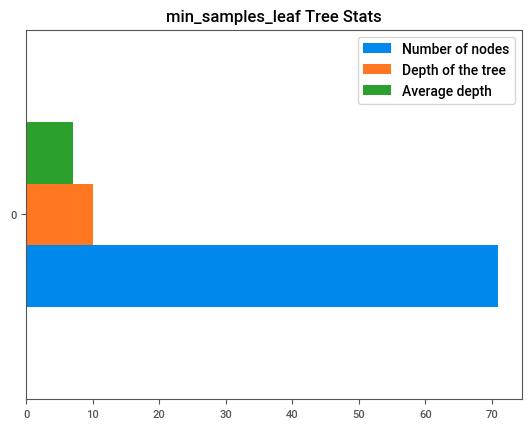

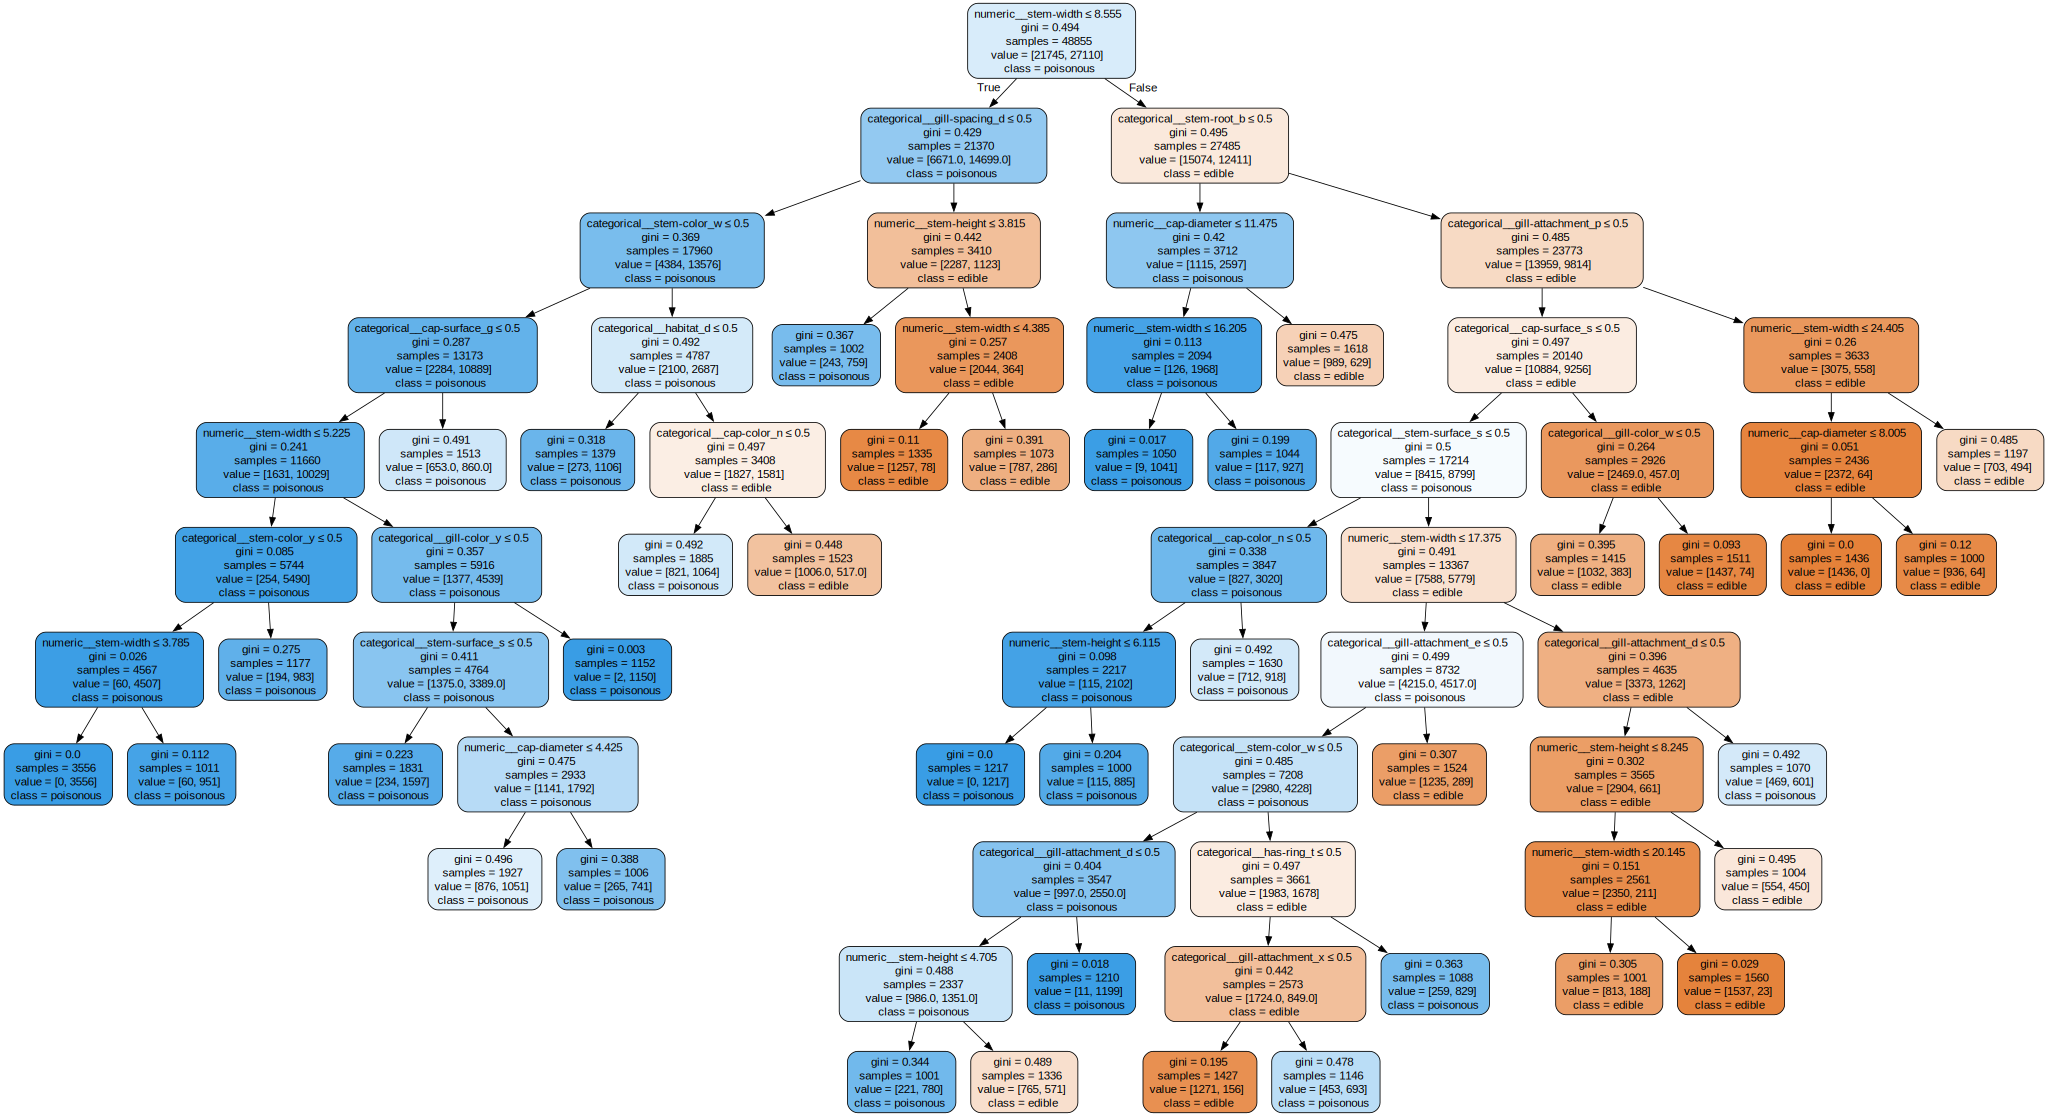

In [29]:
dt_classifier = DecisionTreeClassifier(random_state=42, min_samples_leaf=1000)
model = Pipeline(
    [
        ("preprocessor", preprocessor),
        ("dt", dt_classifier),
    ]
)

model.fit(X_train, y_train)

min_samples_leaf_cr, min_samples_leaf_cm, min_samples_leaf_fi, min_samples_leaf_graph, min_samples_leaf_tree = decision_tree_analysis("min_samples_leaf", model, X_test, y_test)

show_confusion_matrics(min_samples_leaf_cm, "min_samples_leaf", model.named_steps["dt"])

show_classification_report(min_samples_leaf_cr, "min_samples_leaf")

show_feature_importances(min_samples_leaf_fi, "min_samples_leaf")

show_tree_stats(min_samples_leaf_tree, "min_samples_leaf")

SVG(min_samples_leaf_graph.pipe(format="svg"))

## Minimalny spadek nieczystości

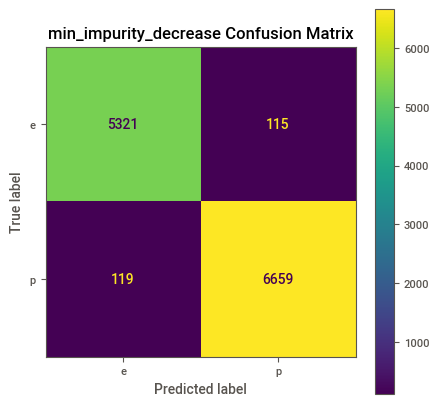

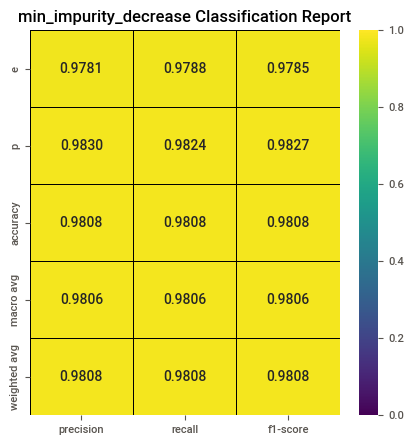

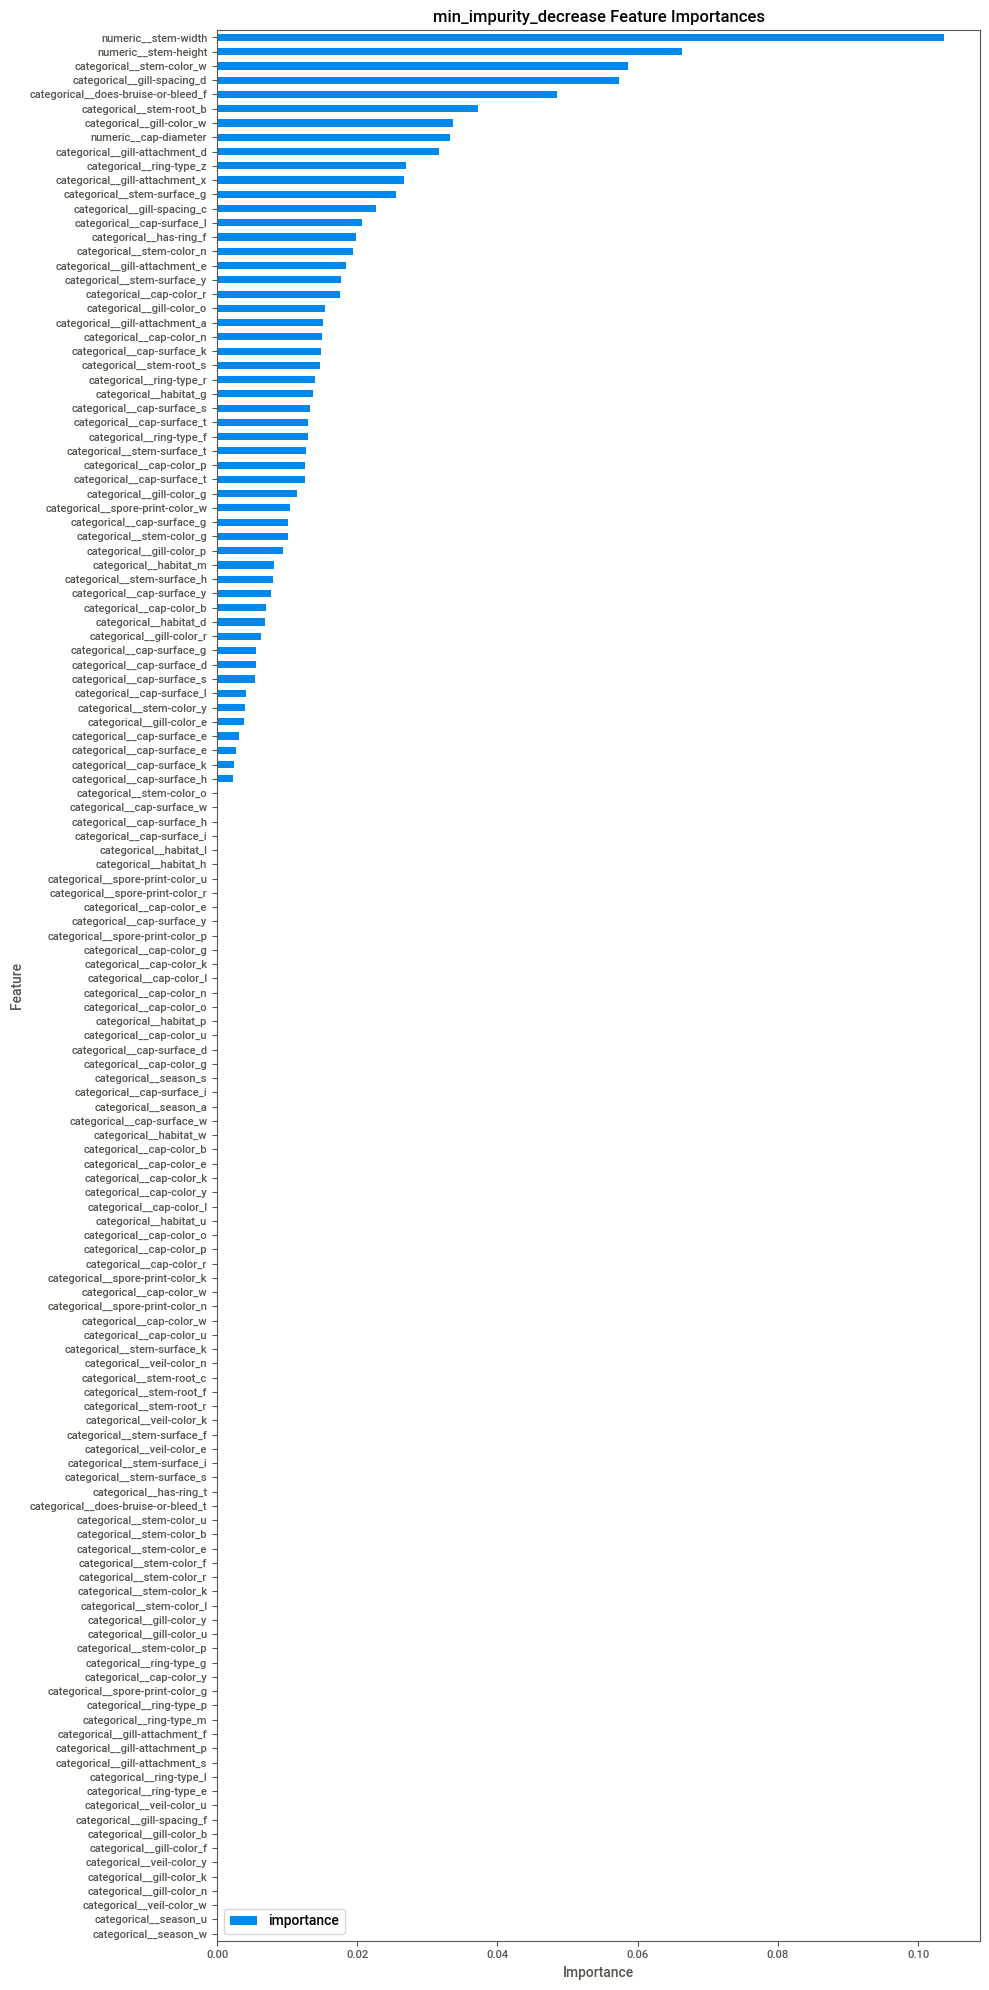

Number of nodes: 169
Depth of the tree: 16
Average depth: 10.5625


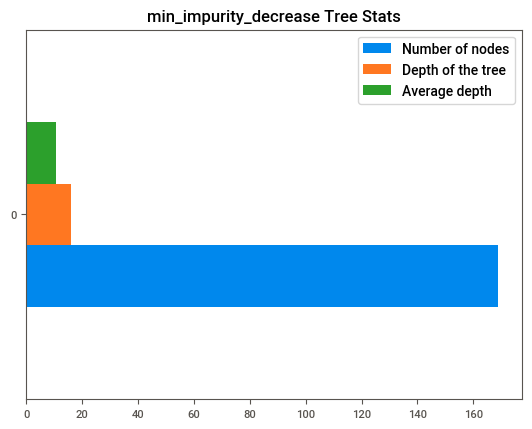

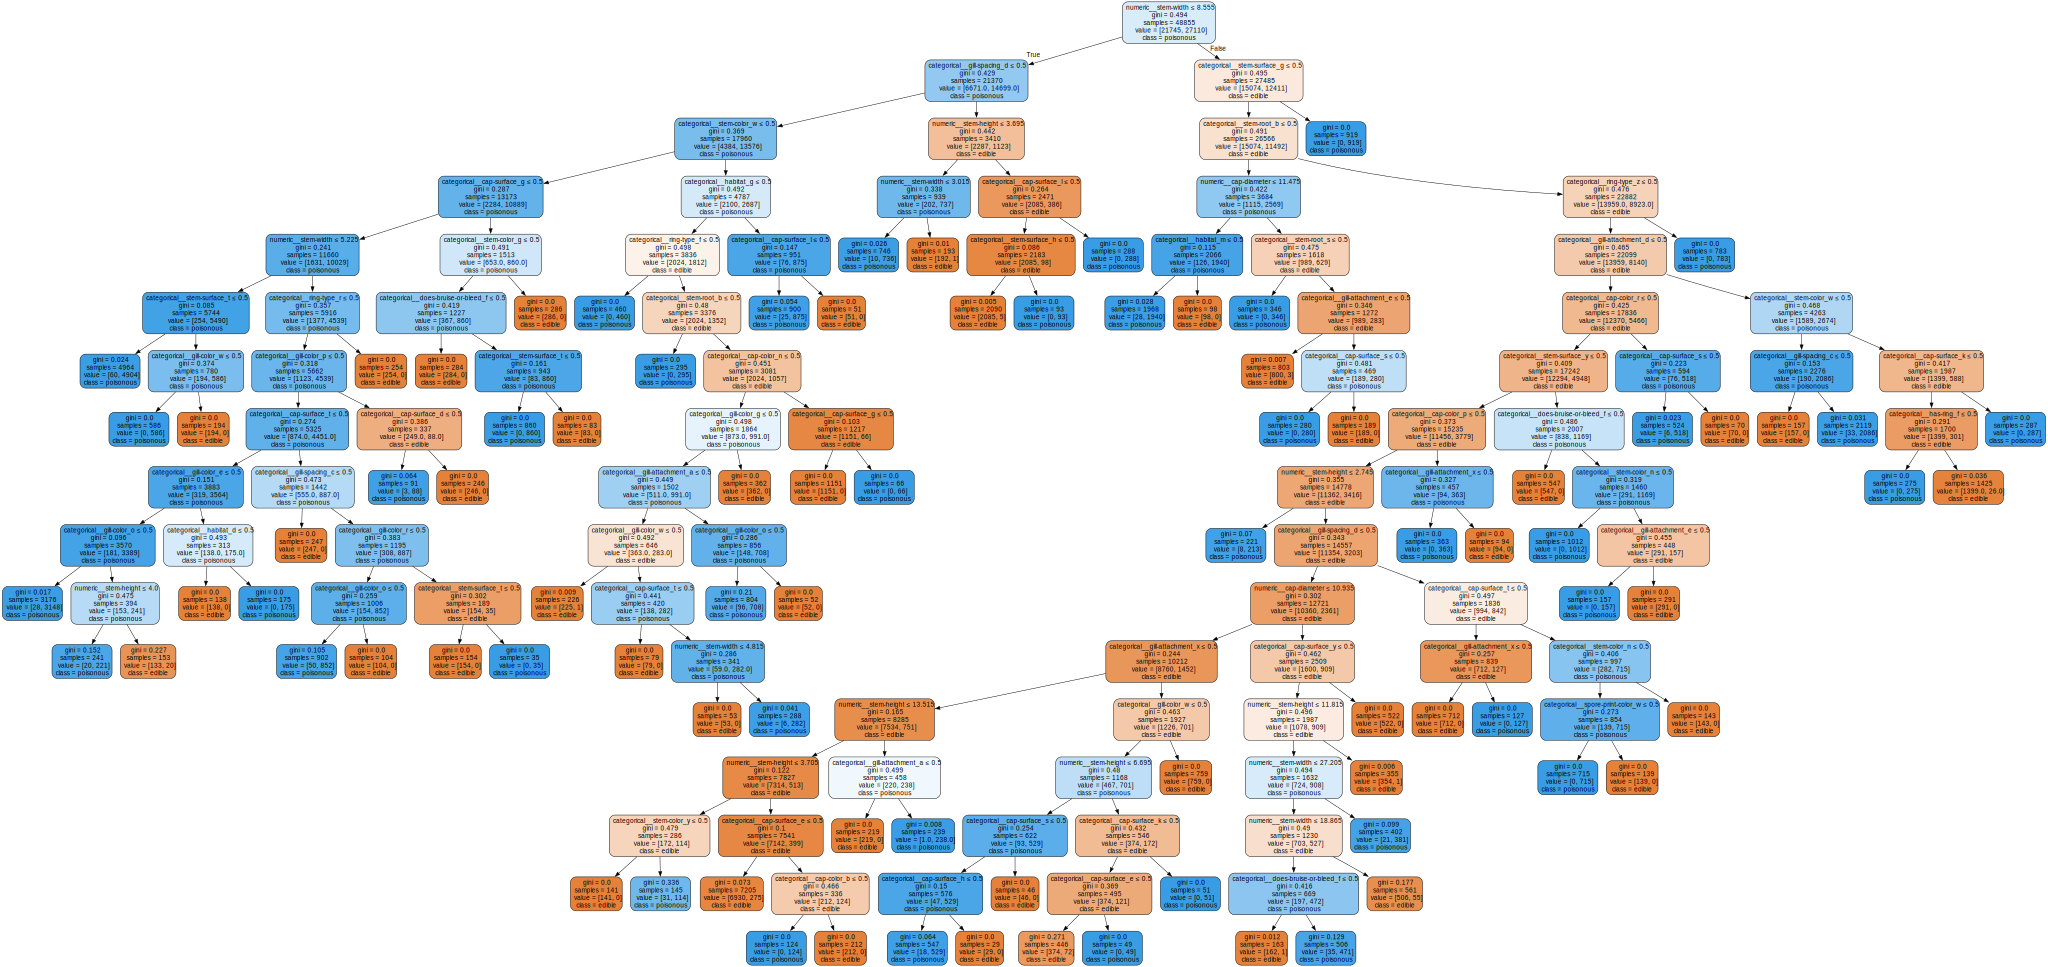

In [30]:
dt_classifier = DecisionTreeClassifier(random_state=42, min_impurity_decrease=0.001)
model = Pipeline(
    [
        ("preprocessor", preprocessor),
        ("dt", dt_classifier),
    ]
)

model.fit(X_train, y_train)

min_impurity_decrease_cr, min_impurity_decrease_cm, min_impurity_decrease_fi, min_impurity_decrease_graph, min_impurity_decrease_tree = decision_tree_analysis("min_impurity_decrease", model, X_test, y_test)

show_confusion_matrics(min_impurity_decrease_cm, "min_impurity_decrease", model.named_steps["dt"])

show_classification_report(min_impurity_decrease_cr, "min_impurity_decrease")

show_feature_importances(min_impurity_decrease_fi, "min_impurity_decrease")

show_tree_stats(min_impurity_decrease_tree, "min_impurity_decrease")

SVG(min_impurity_decrease_graph.pipe(format="svg"))


##  Zbadanie jak użycie parametru wagi klasy wpływa na wyniki modelu.

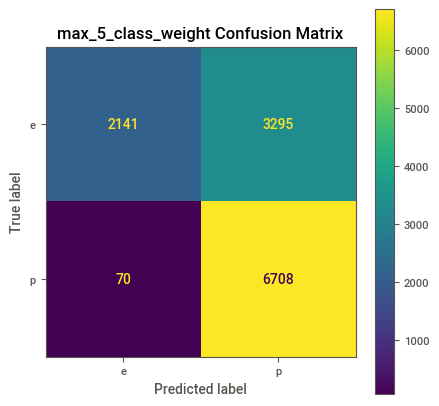

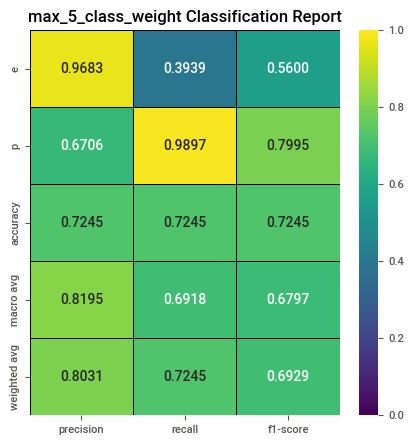

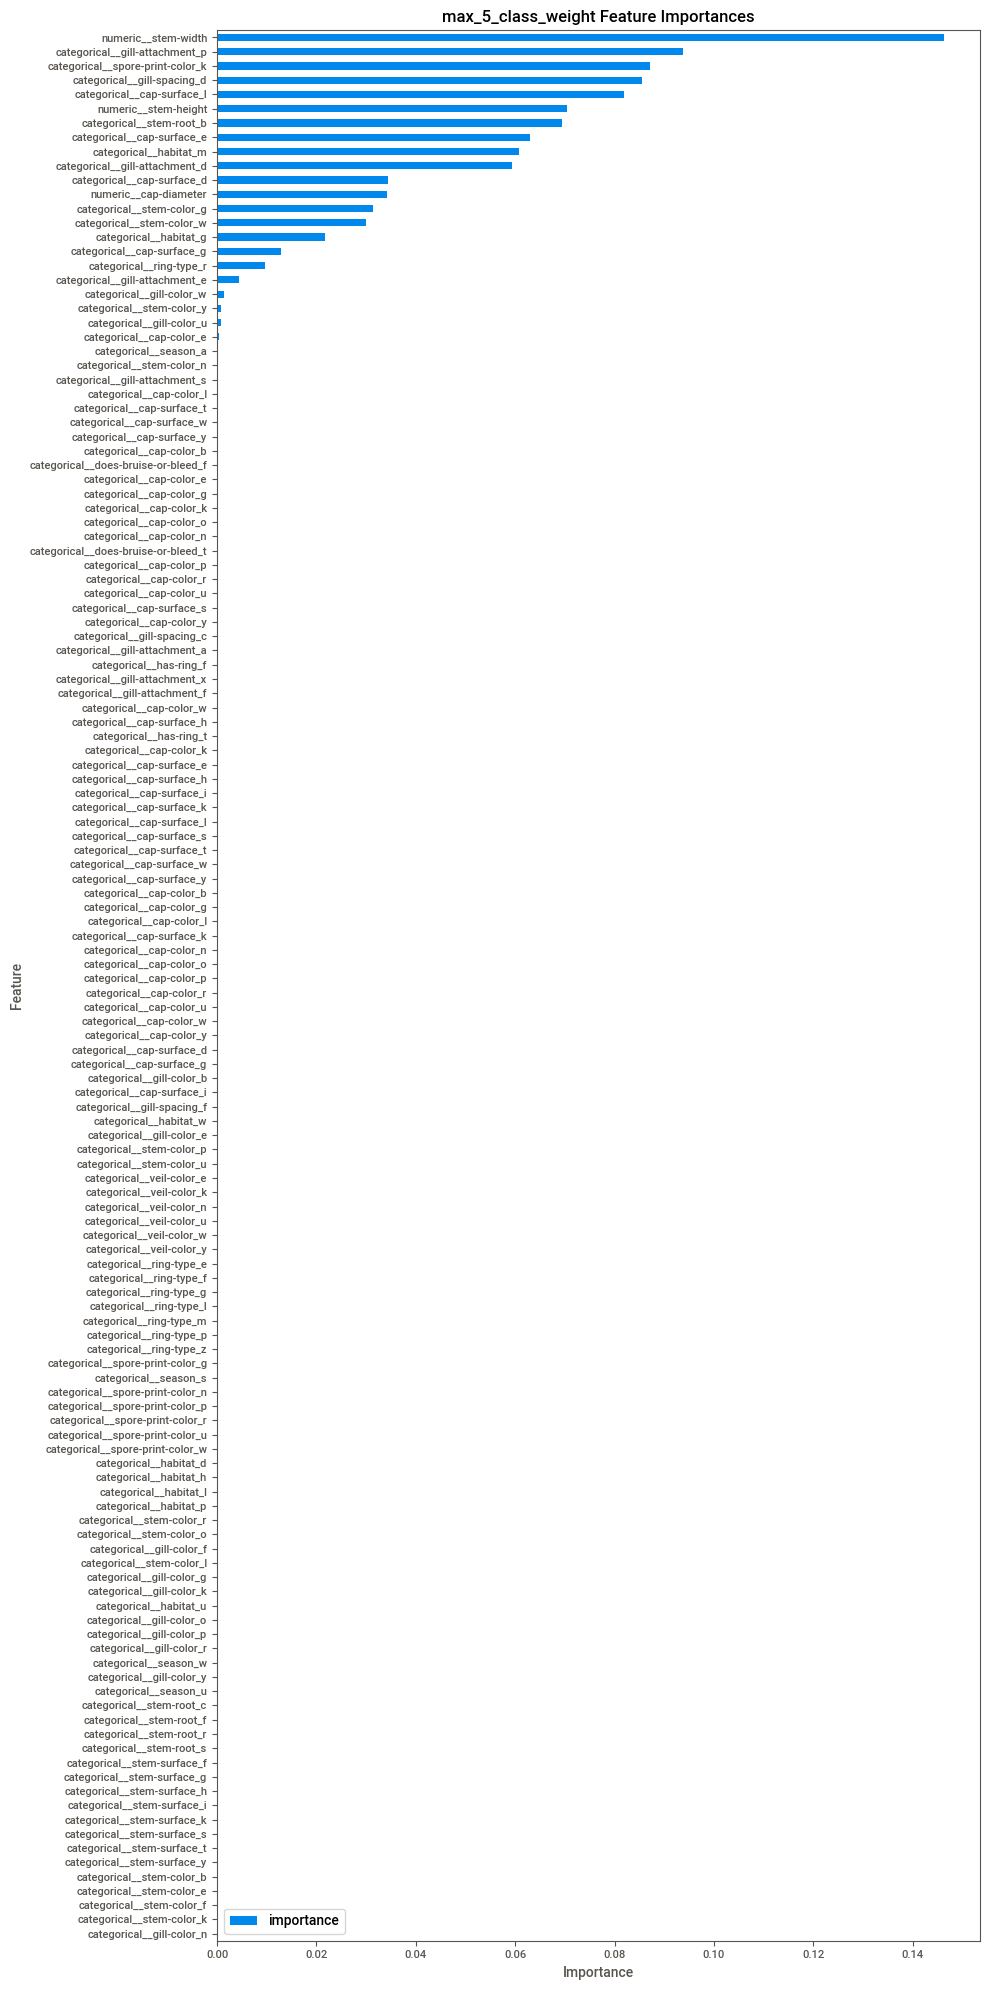

Number of nodes: 57
Depth of the tree: 5
Average depth: 11.4


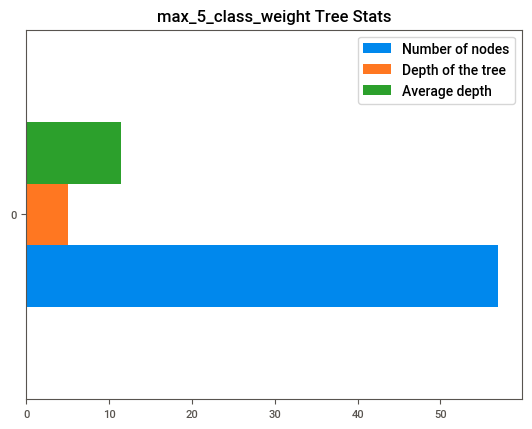

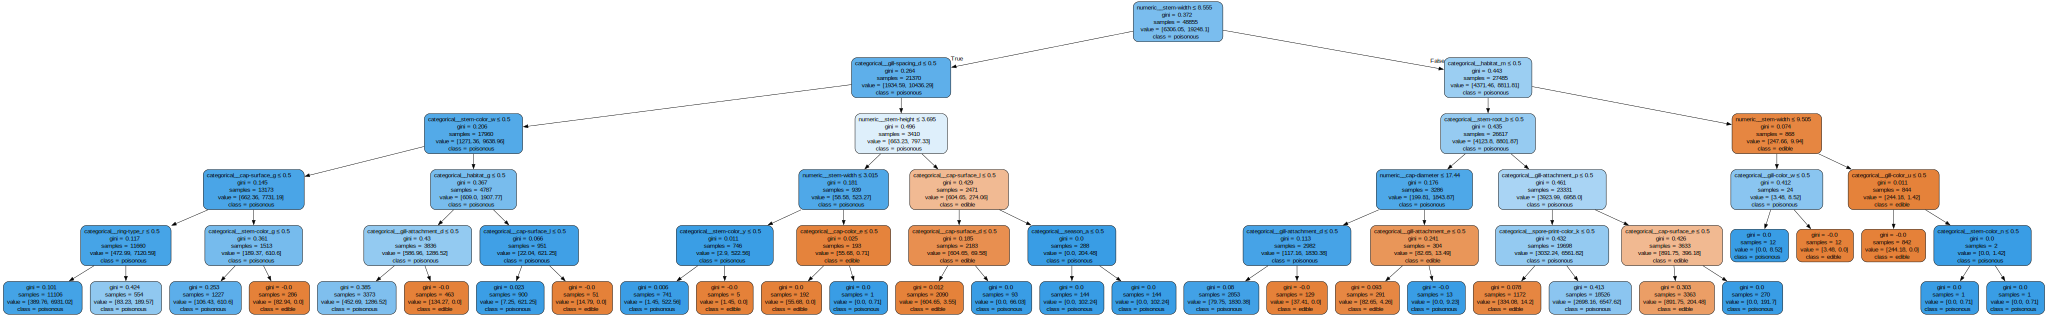

In [31]:
class_weight = {'e': 0.29, 'p': 0.71} # a może powiniśmy 'skrzywić' w stronę p aby zminimalizować możliwość zatrucia?
dt_classifier = DecisionTreeClassifier(random_state=42, max_depth=5, class_weight=class_weight)
model = Pipeline(
    [
        ("preprocessor", preprocessor),
        ("dt", dt_classifier),
    ]
)

# normal fit
model.fit(X_train, y_train)


max_5_class_weight_cr, max_5_class_weight_cm, max_5_class_weight_fi, max_5_class_weight_graph, max_5_class_weight_tree = decision_tree_analysis("max_5_class_weight", model, X_test, y_test)

show_confusion_matrics(max_5_class_weight_cm, "max_5_class_weight", model.named_steps["dt"])

show_classification_report(max_5_class_weight_cr, "max_5_class_weight")

show_feature_importances(max_5_class_weight_fi, "max_5_class_weight")

show_tree_stats(max_5_class_weight_tree, "max_5_class_weight")

SVG(max_5_class_weight_graph.pipe(format="svg"))


## Badanie wpływy cpp_alpha na wyniki modelu.

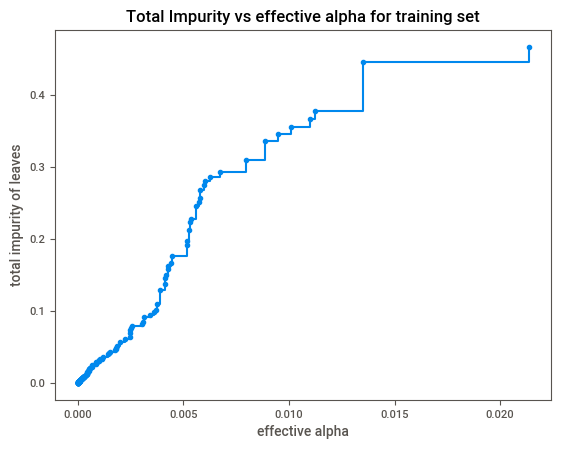

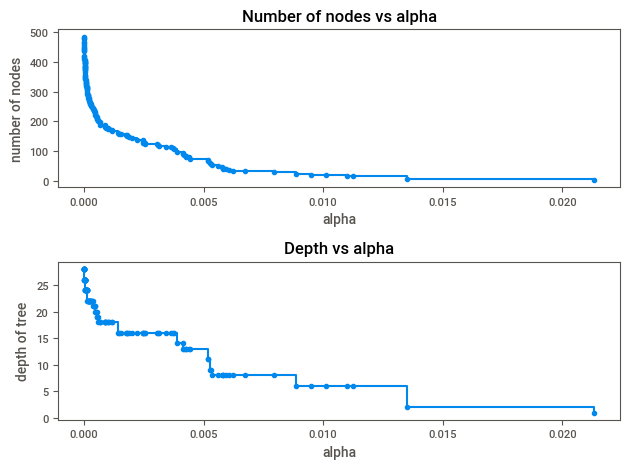

In [32]:
import matplotlib.pyplot as plt
dt_classifier = DecisionTreeClassifier(random_state=42)
model = Pipeline(
    [
        ("preprocessor", preprocessor),
        ("dt", dt_classifier),
    ]
)
X_train_preprocessed = model['preprocessor'].transform(X_train)
X_test_preprocessed = model['preprocessor'].transform(X_test)
path = model["dt"].cost_complexity_pruning_path(X_train_preprocessed, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(X_train_preprocessed, y_train)
    clfs.append(clf)

clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

## Podsumowanie

### Macierz pomyłek

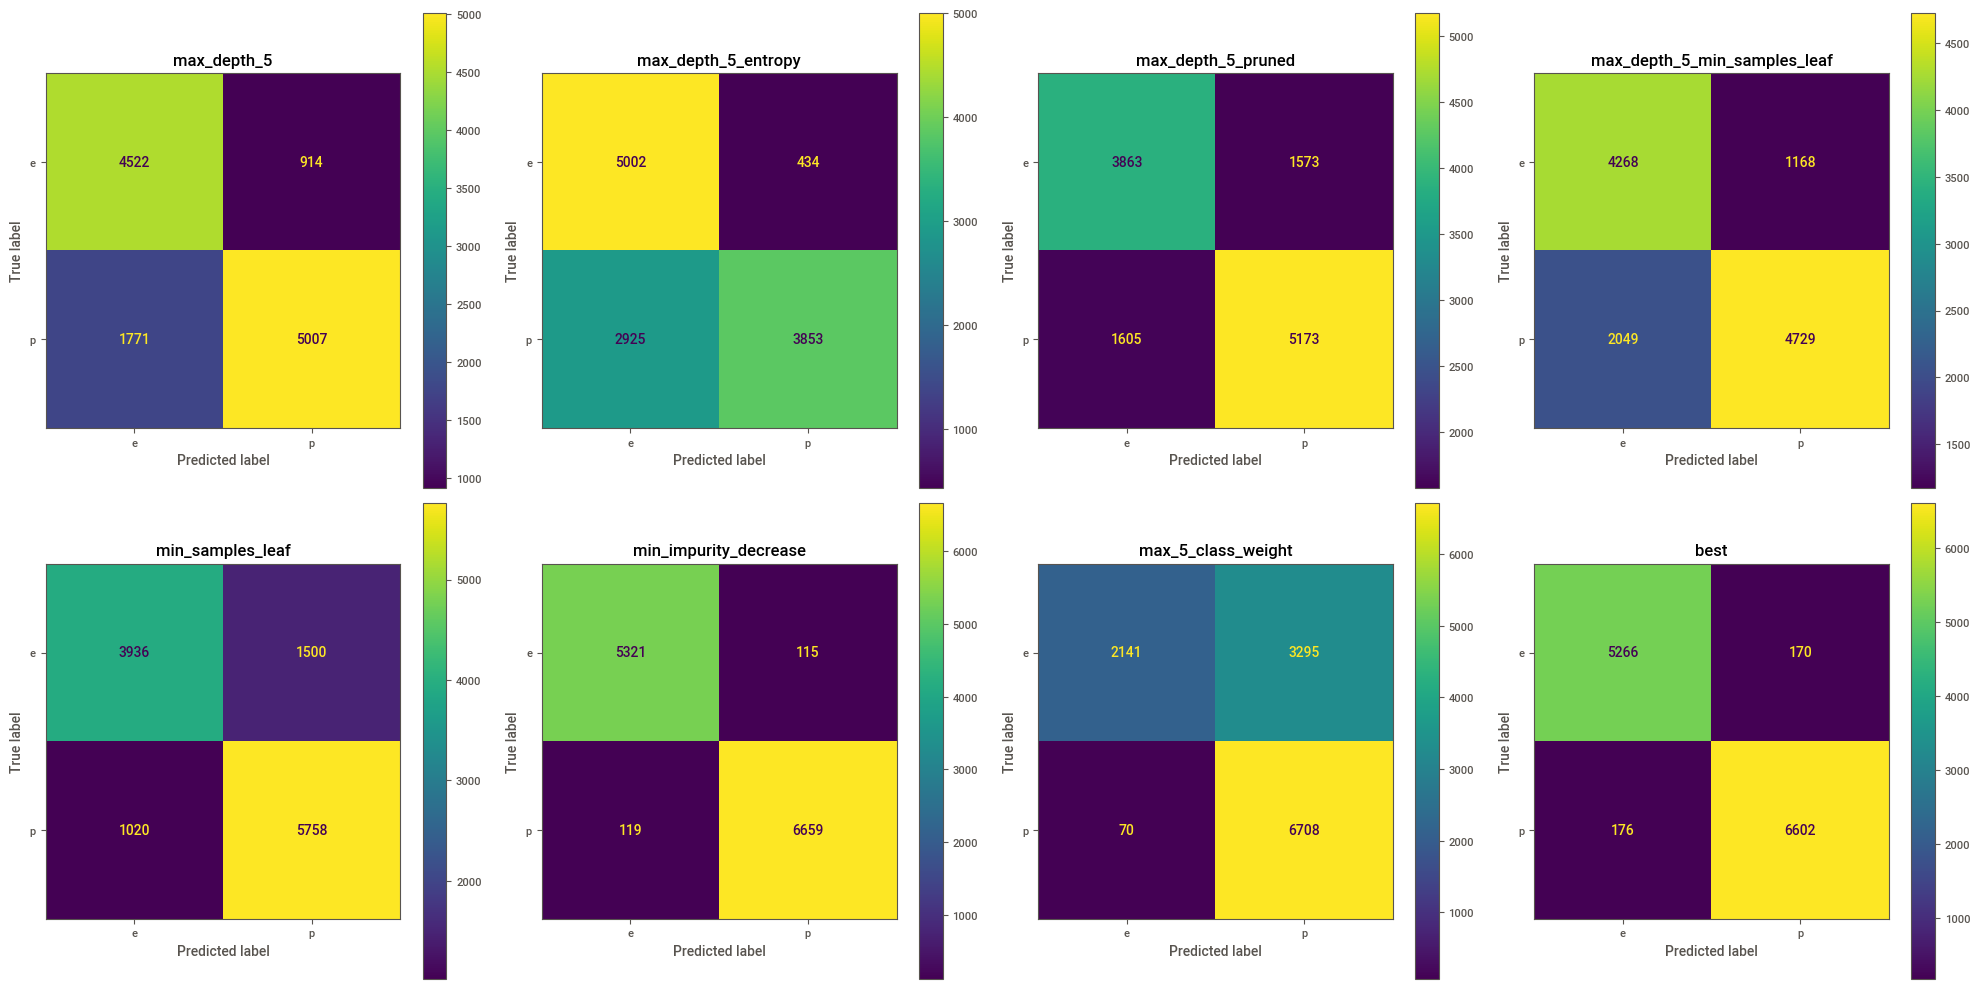

In [33]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))

labels = best_model.named_steps["dt"].classes_
ConfusionMatrixDisplay(confusion_matrix=max_depth_5_cm, display_labels=labels).plot(
    ax=ax[0, 0]
)
ax[0, 0].set_title("max_depth_5")
ConfusionMatrixDisplay(confusion_matrix=max_depth_5_entropy_cm, display_labels=labels).plot(
    ax=ax[0, 1]
)
ax[0, 1].set_title("max_depth_5_entropy")
ConfusionMatrixDisplay(
    confusion_matrix=max_depth_5_pruned_cm, display_labels=labels
).plot(ax=ax[0, 2])
ax[0, 2].set_title("max_depth_5_pruned")
ConfusionMatrixDisplay(
    confusion_matrix=max_depth_5_min_samples_leaf_cm, display_labels=labels
).plot(ax=ax[0, 3])
ax[0, 3].set_title("max_depth_5_min_samples_leaf")
ConfusionMatrixDisplay(
    confusion_matrix=min_samples_leaf_cm, display_labels=labels
).plot(ax=ax[1, 0])
ax[1, 0].set_title("min_samples_leaf")
ConfusionMatrixDisplay(
    confusion_matrix=min_impurity_decrease_cm, display_labels=labels
).plot(ax=ax[1, 1])
ax[1, 1].set_title("min_impurity_decrease")
ConfusionMatrixDisplay(
    confusion_matrix=max_5_class_weight_cm, display_labels=labels
).plot(ax=ax[1, 2])
ax[1, 2].set_title("max_5_class_weight")
ConfusionMatrixDisplay(confusion_matrix=best_cm, display_labels=labels).plot(
    ax=ax[1, 3]
)
ax[1, 3].set_title("best")


fig.tight_layout()
plt.show()

### Raport klasyfikacji

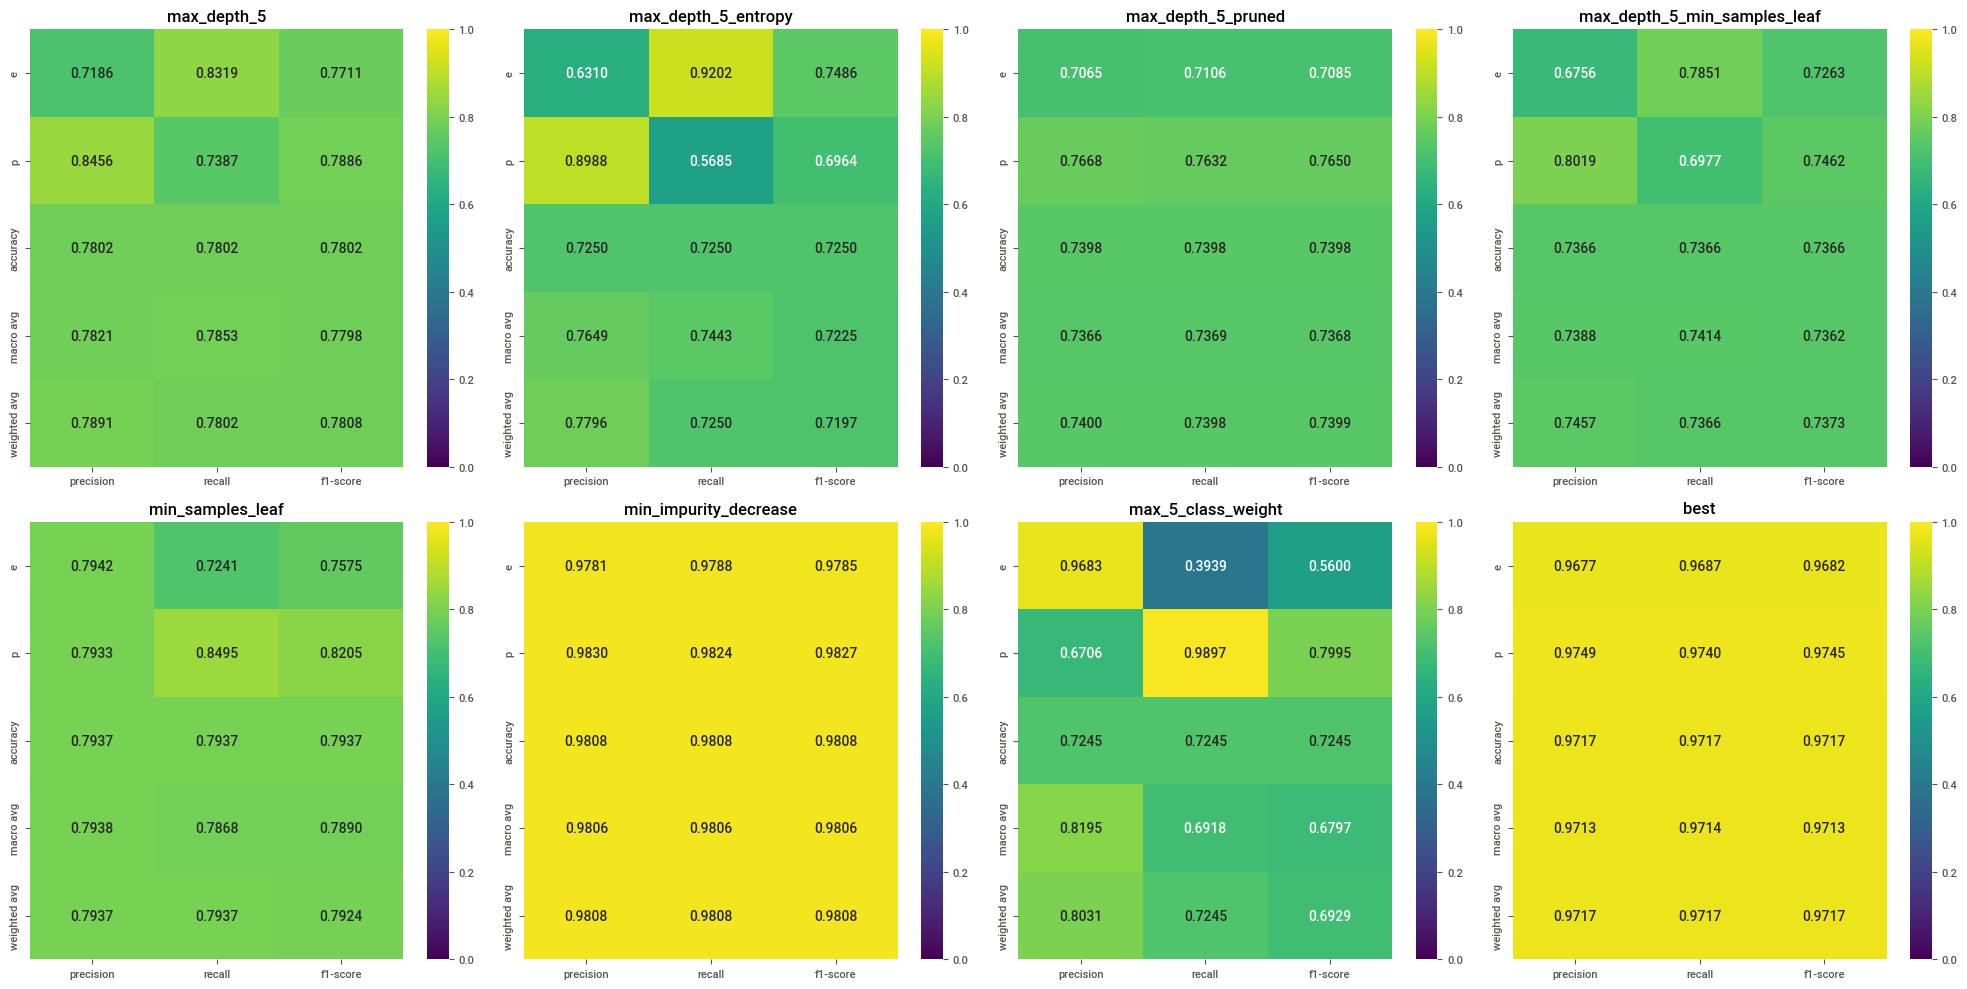

In [34]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))

sns.heatmap(
    pd.DataFrame(max_depth_5_cr).iloc[:-1, :].T,
    annot=True,
    ax=ax[0][0],
    cmap="viridis",
    vmin=0,
    vmax=1,
    fmt=".4f",
)
ax[0][0].set_title("max_depth_5")

sns.heatmap(
    pd.DataFrame(max_depth_5_entropy_cr).iloc[:-1, :].T,
    annot=True,
    ax=ax[0][1],
    cmap="viridis",
    vmin=0,
    vmax=1,
    fmt=".4f",
)
ax[0][1].set_title("max_depth_5_entropy")

sns.heatmap(
    pd.DataFrame(max_depth_5_pruned_cr).iloc[:-1, :].T,
    annot=True,
    ax=ax[0][2],
    cmap="viridis",
    vmin=0,
    vmax=1,
    fmt=".4f",
)

ax[0][2].set_title("max_depth_5_pruned")

sns.heatmap(
    pd.DataFrame(max_depth_5_min_samples_leaf_cr).iloc[:-1, :].T,
    annot=True,
    ax=ax[0][3],
    cmap="viridis",
    vmin=0,
    vmax=1,
    fmt=".4f",
)

ax[0][3].set_title("max_depth_5_min_samples_leaf")

sns.heatmap(
    pd.DataFrame(min_samples_leaf_cr).iloc[:-1, :].T,
    annot=True,
    ax=ax[1][0],
    cmap="viridis",
    vmin=0,
    vmax=1,
    fmt=".4f",
)

ax[1][0].set_title("min_samples_leaf")

sns.heatmap(
    pd.DataFrame(min_impurity_decrease_cr).iloc[:-1, :].T,
    annot=True,
    ax=ax[1][1],
    cmap="viridis",
    vmin=0,
    vmax=1,
    fmt=".4f",
)

ax[1][1].set_title("min_impurity_decrease")

sns.heatmap(
    pd.DataFrame(max_5_class_weight_cr).iloc[:-1, :].T,
    annot=True,
    ax=ax[1][2],
    cmap="viridis",
    vmin=0,
    vmax=1,
    fmt=".4f",
)

ax[1][2].set_title("max_5_class_weight")

sns.heatmap(
    pd.DataFrame(best_cr).iloc[:-1, :].T,
    annot=True,
    ax=ax[1][3],
    cmap="viridis",
    vmin=0,
    vmax=1,
    fmt=".4f",
)

ax[1][3].set_title("best")

fig.tight_layout()
plt.show()

### Raport ważności cech

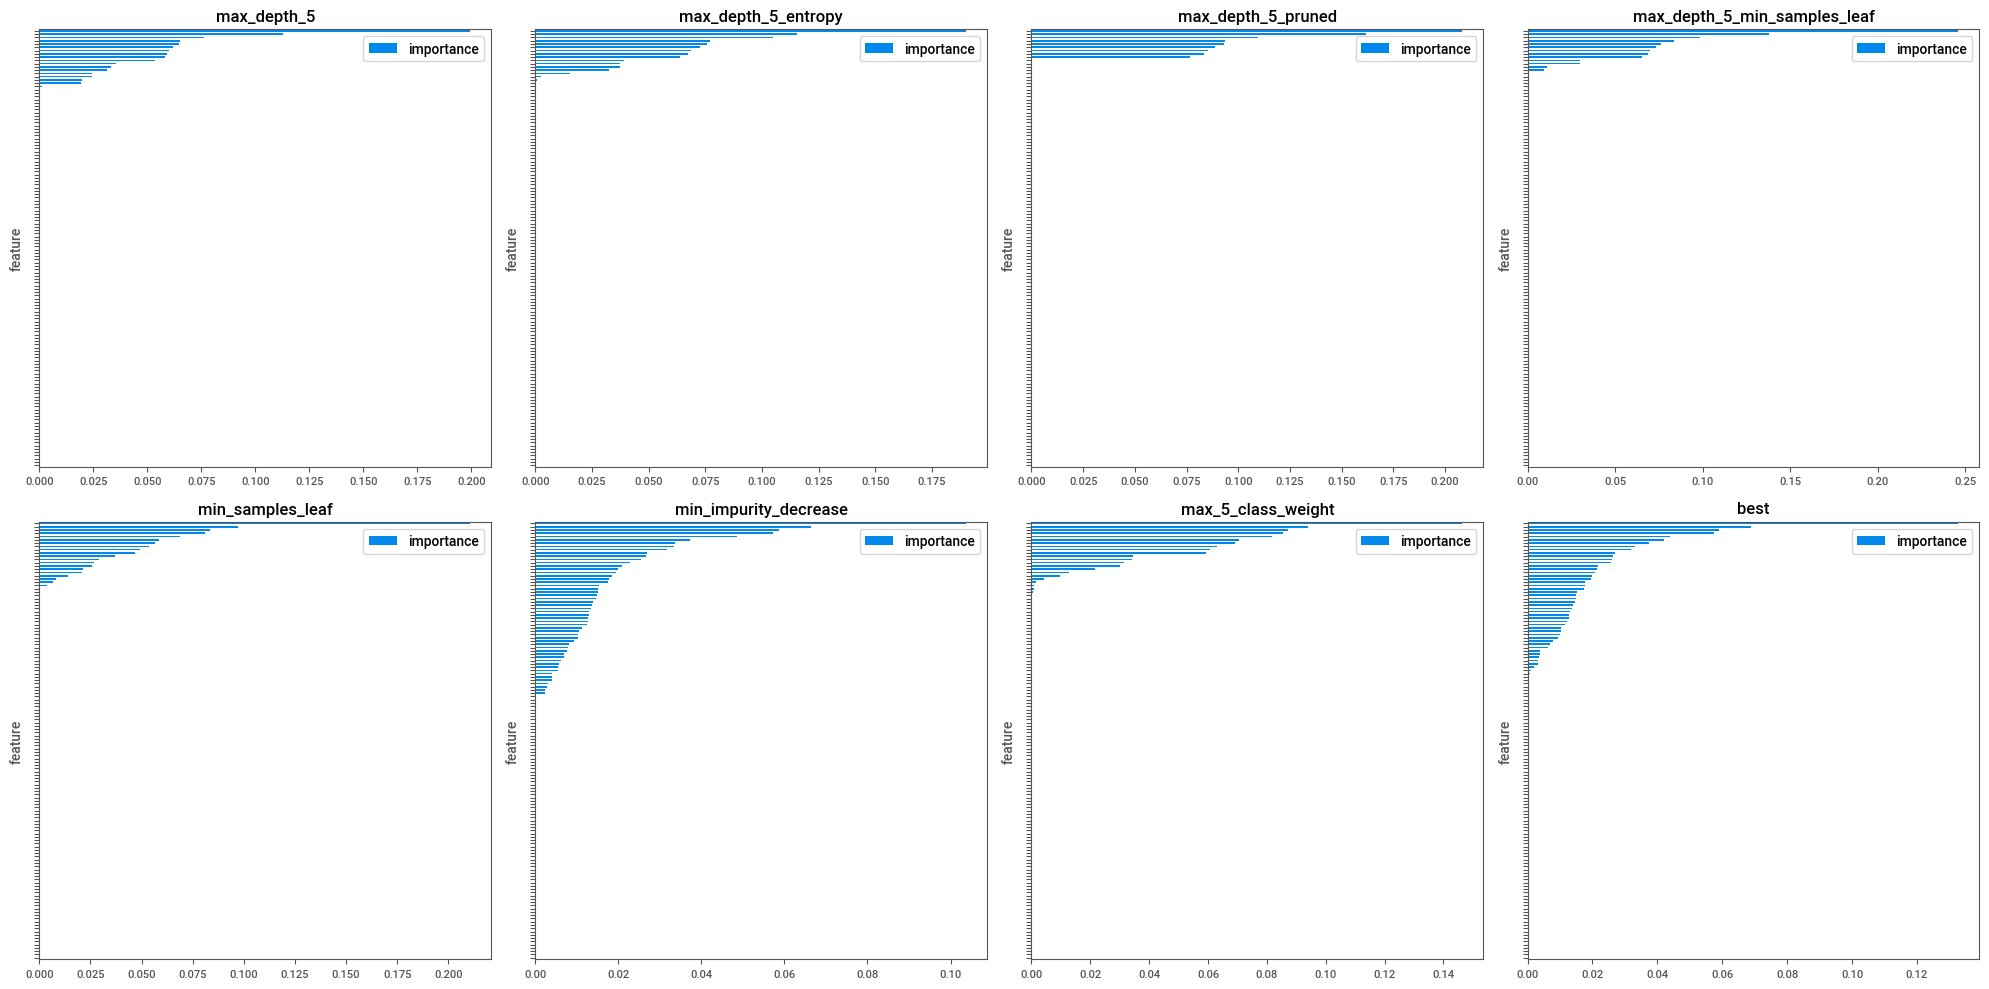

In [35]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))

max_depth_5_fi.plot.barh(x="feature", y="importance", ax=ax[0][0])
ax[0][0].set_title("max_depth_5")
ax[0][0].set_yticklabels([])

max_depth_5_entropy_fi.plot.barh(x="feature", y="importance", ax=ax[0][1])
ax[0][1].set_title("max_depth_5_entropy")
ax[0][1].set_yticklabels([])

max_depth_5_pruned_fi.plot.barh(x="feature", y="importance", ax=ax[0][2])
ax[0][2].set_title("max_depth_5_pruned")
ax[0][2].set_yticklabels([])

max_depth_5_min_samples_leaf_fi.plot.barh(x="feature", y="importance", ax=ax[0][3])
ax[0][3].set_title("max_depth_5_min_samples_leaf")
ax[0][3].set_yticklabels([])

min_samples_leaf_fi.plot.barh(x="feature", y="importance", ax=ax[1][0])
ax[1][0].set_title("min_samples_leaf")
ax[1][0].set_yticklabels([])

min_impurity_decrease_fi.plot.barh(x="feature", y="importance", ax=ax[1][1])
ax[1][1].set_title("min_impurity_decrease")
ax[1][1].set_yticklabels([])

max_5_class_weight_fi.plot.barh(x="feature", y="importance", ax=ax[1][2])
ax[1][2].set_title("max_5_class_weight")
ax[1][2].set_yticklabels([])

best_fi.plot.barh(x="feature", y="importance", ax=ax[1][3])
ax[1][3].set_title("best")
ax[1][3].set_yticklabels([])

fig.tight_layout()
plt.show()

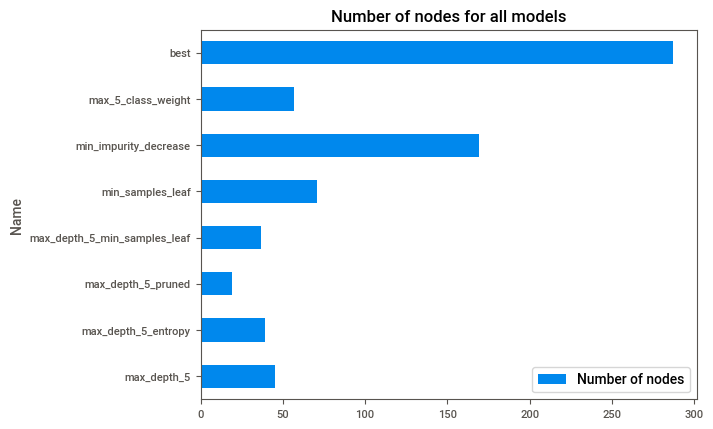

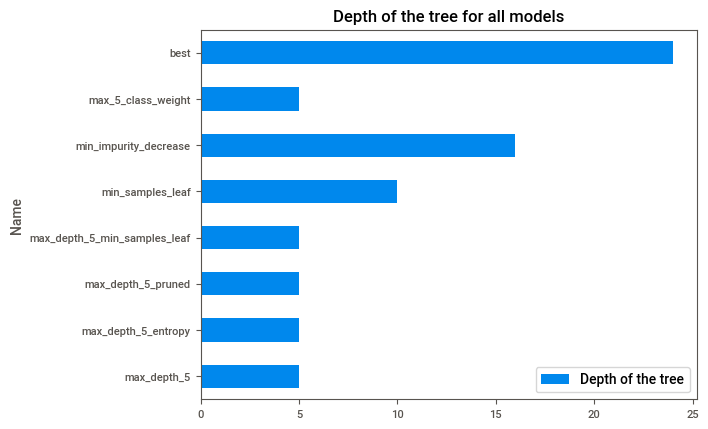

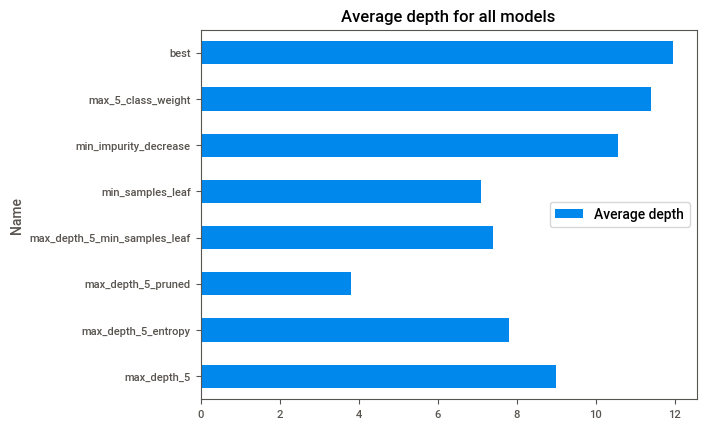

In [36]:
max_depth_5_tree_stats = show_tree_stats(max_depth_5_tree, "max_depth_5", False)

max_depth_5_entropy_tree_stats = show_tree_stats(
    max_depth_5_entropy_tree, "max_depth_5_entropy", False
)

max_depth_5_pruned_tree_stats = show_tree_stats(
    max_depth_5_pruned_tree, "max_depth_5_pruned", False
)

max_depth_5_min_samples_leaf_tree_stats = show_tree_stats(
    max_depth_5_min_samples_leaf_tree, "max_depth_5_min_samples_leaf", False
)

min_samples_leaf_tree_stats = show_tree_stats(
    min_samples_leaf_tree, "min_samples_leaf", False
)

min_impurity_decrease_tree_stats = show_tree_stats(
    min_impurity_decrease_tree, "min_impurity_decrease", False
)

max_5_class_weight_tree_stats = show_tree_stats(
    max_5_class_weight_tree, "max_5_class_weight", False
)

best_tree_stats = show_tree_stats(best_tree, "best", False)

# all above _stats are df lets concat it

concated = pd.concat([max_depth_5_tree_stats, max_depth_5_entropy_tree_stats, max_depth_5_pruned_tree_stats, max_depth_5_min_samples_leaf_tree_stats, min_samples_leaf_tree_stats, min_impurity_decrease_tree_stats, max_5_class_weight_tree_stats, best_tree_stats], axis=0)

# compare all stats by number of nodes

# compare 'Number of nodes' for all models
concated.plot.barh(y='Number of nodes', x='Name')
plt.title('Number of nodes for all models')
plt.show()

# compare 'Depth of the tree' for all models
concated.plot.barh(y='Depth of the tree', x='Name')
plt.title('Depth of the tree for all models')
plt.show()

# compare 'Average depth' for all models
concated.plot.barh(y='Average depth', x='Name')
plt.title('Average depth for all models')
plt.show()


## FAQ
1. Co znajduje się w liściach drzewa?
    - W liściach drzewa znajdują się klasy, które model przypisuje do obserwacji.
2. Czy przycinanie drzewa (pruning) jest potrzebne? Na czym polega ten proces?
    - Przycinanie drzewa jest procesem, w którym usuwane są gałęzie, które nie przynoszą korzyści w postaci poprawy wyników modelu. Przycinanie drzewa pozwala na zredukowanie złożoności modelu, co może przyczynić się do poprawy jego generalizacji.
3. Czy drzewo możebyćza„duże” lub za „małe”?
    - Drzewo może być zbyt duże, jeśli posiada zbyt wiele gałęzi i liści, co może prowadzić do przeuczenia modelu. Z kolei drzewo może być zbyt małe, jeśli posiada zbyt mało gałęzi i liści, co może prowadzić do niedouczenia modelu.
4. Czy drzewo decyzyjne potrzebuje normalizacji/standaryzacji/dyskretyzacji danych?
    - Drzewo decyzyjne nie wymaga normalizacji/standaryzacji/dyskretyzacji danych, ponieważ jest odporne na różne skale danych.
5. Czy model możnaprzeuczyć?
    - Model można przeuczyć, jeśli posiada zbyt dużą złożoność, co prowadzi do zbyt dobrego dopasowania do danych treningowych i zbyt słabej generalizacji do nowych danych.
6. Na czym polega wagowanie klas?
    - W wagowaniu klas przypisuje się różne wagi klasom w celu zrównoważenia wpływu poszczególnych klas na wyniki modelu.
    - Domyślnie DecissionTreeClassifier obliza wagi klas na podstawie ilości wystąpień danej klasy w zbiorze treningowym.
7. Na czym polega walidacja krzyżowa (ang. cross validation) w algorytmie przeszukiwania hiperparametrów
    - Walidacja krzyżowa polega na podziale zbioru danych na k podzbiorów, z których jeden podzbiór jest wykorzystywany jako zbiór testowy, a pozostałe podzbiory jako zbiór treningowy. Proces ten jest powtarzany k razy, a wyniki są uśredniane. Walidacja krzyżowa pozwala na ocenę jakości modelu na różnych podzbiorach danych i zwiększa wiarygodność wyników.
